In [2]:
!python -m pip install tabnet_keras

You should consider upgrading via the 'c:\Users\lenovo\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
import tabnet_keras

# Import library

In [34]:
import pandas as pd
import numpy as np
import math as math
import random
from sklearn.utils import shuffle
import sklearn.preprocessing  as prepro
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
from xgboost import XGBClassifier
# from adjustText import adjust_text


#constants
random_state = 42
plotColor = ['b','g','r','m','c', 'y']
markers = ['+','o','*','^','v','>','<']

#set up
sns.set(style='whitegrid')
%matplotlib inline

# Read Data

In [35]:
# Load the datasets
holdout_df = pd.read_csv('cell2cellholdout.csv')
train_df = pd.read_csv('cell2celltrain.csv')

# Merge the datasets
merged_df = pd.concat([holdout_df, train_df], ignore_index=True)

# Save the merged dataset
merged_df.to_csv('cell2cell.csv', index=False)

In [36]:
telecom_data  = pd.read_csv("cell2celltrain.csv")

In [37]:
telecom_data

CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0         3000002   Yes           24.00           219.0                  22.0   
1         3000010   Yes           16.99            10.0                  17.0   
2         3000014    No           38.00             8.0                  38.0   
3         3000022    No           82.28          1312.0                  75.0   
4         3000026   Yes           17.14             0.0                  17.0   
...           ...   ...             ...             ...                   ...   
51042     3399958   Yes             NaN             NaN                   NaN   
51043     3399974    No           95.17          1745.0                  85.0   
51044     3399978   Yes             NaN             NaN                   NaN   
51045     3399990    No             NaN             NaN                   NaN   
51046     3399994    No             NaN             NaN                   NaN   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                       0.25             0.0           0.0             -157.0   
1                       0.00             0.0           0.0               -4.0   
2                       0.00             0.0           0.0               -2.0   
3                       1.24             0.0           0.0              157.0   
4                       0.00             0.0           0.0                0.0   
...                      ...             ...           ...                ...   
51042                    NaN             NaN           NaN                NaN   
51043                   0.99            45.0           4.7              122.0   
51044                    NaN             NaN           NaN                NaN   
51045                    NaN             NaN           NaN                NaN   
51046                    NaN             NaN           NaN                NaN   

       PercChangeRevenues  ...  ReferralsMadeBySubscriber  IncomeGroup  \
0                   -19.0  ...                          0            4   
1                     0.0  ...                          0            5   
2                     0.0  ...                          0            6   
3                     8.1  ...                          0            6   
4                    -0.2  ...                          0            9   
...                   ...  ...                        ...          ...   
51042                 NaN  ...                          0            6   
51043                15.9  ...                          0            9   
51044                 NaN  ...                          0            7   
51045                 NaN  ...                          0            9   
51046                 NaN  ...                          0            0   

       OwnsMotorcycle  AdjustmentsToCreditRating  HandsetPrice  \
0                  No                          0            30   
1                  No                          0            30   
2                  No                          0       Unknown   
3                  No                          0            10   
4                  No                          1            10   
...               ...                        ...           ...   
51042              No                          0            60   
51043              No                          1            60   
51044              No                          1            80   
51045              No                          0            30   
51046              No                          1            60   

       MadeCallToRetentionTeam  CreditRating  PrizmCode    Occupation  \
0                          Yes     1-Highest   Suburban  Professional   
1                           No      4-Medium   Suburban  Professional   
2                           No        3-Good       Town        Crafts   
3                           No      4-Medium      Other         Other   
4             

In [38]:
telecom_data.dtypes

CustomerID                     int64
Churn                         object
MonthlyRevenue               float64
MonthlyMinutes               float64
TotalRecurringCharge         float64
DirectorAssistedCalls        float64
OverageMinutes               float64
RoamingCalls                 float64
PercChangeMinutes            float64
PercChangeRevenues           float64
DroppedCalls                 float64
BlockedCalls                 float64
UnansweredCalls              float64
CustomerCareCalls            float64
ThreewayCalls                float64
ReceivedCalls                float64
OutboundCalls                float64
InboundCalls                 float64
PeakCallsInOut               float64
OffPeakCallsInOut            float64
DroppedBlockedCalls          float64
CallForwardingCalls          float64
CallWaitingCalls             float64
MonthsInService                int64
UniqueSubs                     int64
ActiveSubs                     int64
ServiceArea                   object
H

In [ ]:
telecom_data["HandsetPrice"] = pd.to_numeric(telecom_data["HandsetPrice"], errors='coerce')

In [27]:
telecom_data.RetentionCalls.describe(), telecom_data.RetentionCalls.unique()

(count    51047.000000
 mean         0.037201
 std          0.206483
 min          0.000000
 25%          0.000000
 50%          0.000000
 75%          0.000000
 max          4.000000
 Name: RetentionCalls, dtype: float64,
 array([1, 0, 3, 2, 4], dtype=int64))

In [28]:
telecom_data.head()

CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0     3000002   Yes           24.00           219.0                  22.0   
1     3000010   Yes           16.99            10.0                  17.0   
2     3000014    No           38.00             8.0                  38.0   
3     3000022    No           82.28          1312.0                  75.0   
4     3000026   Yes           17.14             0.0                  17.0   

   DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                   0.25             0.0           0.0             -157.0   
1                   0.00             0.0           0.0               -4.0   
2                   0.00             0.0           0.0               -2.0   
3                   1.24             0.0           0.0              157.0   
4                   0.00             0.0           0.0                0.0   

   PercChangeRevenues  ...  ReferralsMadeBySubscriber  IncomeGroup  \
0               -19.0  ...                          0            4   
1                 0.0  ...                          0            5   
2                 0.0  ...                          0            6   
3                 8.1  ...                          0            6   
4                -0.2  ...                          0            9   

   OwnsMotorcycle  AdjustmentsToCreditRating  HandsetPrice  \
0              No                          0            30   
1              No                          0            30   
2              No                          0       Unknown   
3              No                          0            10   
4              No                          1            10   

   MadeCallToRetentionTeam  CreditRating  PrizmCode    Occupation  \
0                      Yes     1-Highest   Suburban  Professional   
1                       No      4-Medium   Suburban  Professional   
2                       No        3-Good       Town        Crafts   
3                       No      4-Medium      Other         Other   
4                       No     1-Highest      Other  Professional   

   MaritalStatus  
0             No  
1            Yes  
2            Yes  
3             No  
4            Yes  

[5 rows x 58 columns]

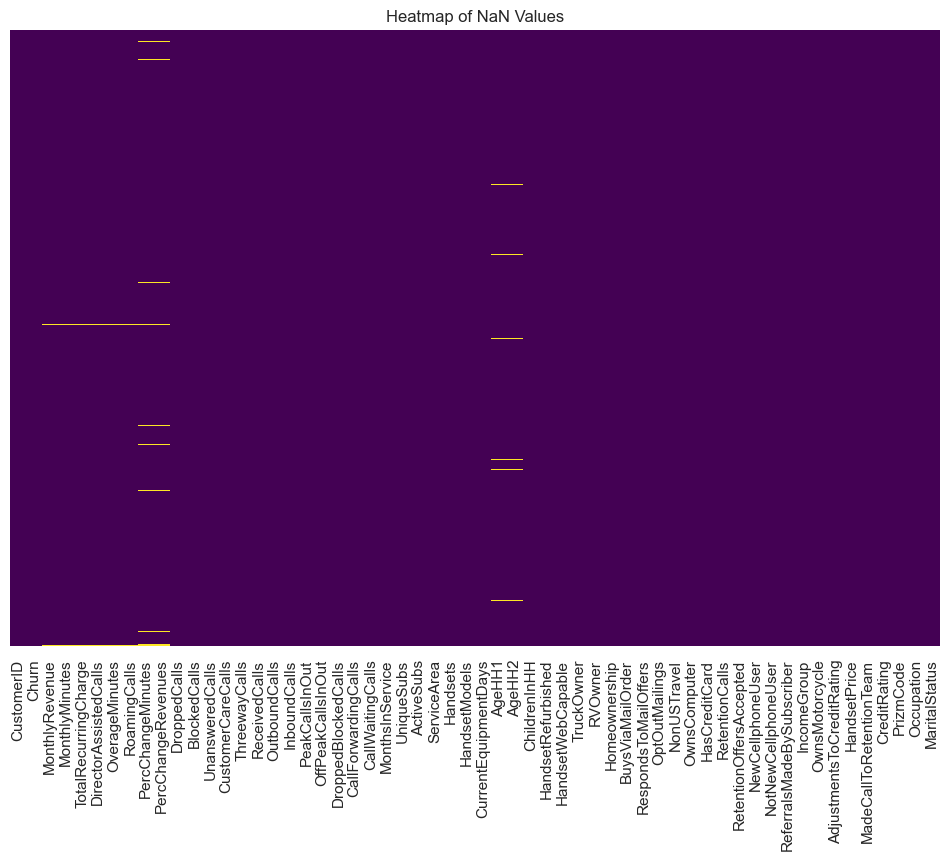

Missing Values  Percentage
MonthlyRevenue                    156    0.305601
MonthlyMinutes                    156    0.305601
TotalRecurringCharge              156    0.305601
DirectorAssistedCalls             156    0.305601
OverageMinutes                    156    0.305601
RoamingCalls                      156    0.305601
PercChangeMinutes                 367    0.718945
PercChangeRevenues                367    0.718945
ServiceArea                        24    0.047015
Handsets                            1    0.001959
HandsetModels                       1    0.001959
CurrentEquipmentDays                1    0.001959
AgeHH1                            909    1.780712
AgeHH2                            909    1.780712

In [29]:
# Check for nan values
import matplotlib.pyplot as plt
import seaborn as sns
# Checking for missing data numerically
missing_data = telecom_data.isna().sum()
missing_percentage = (missing_data / len(telecom_data)) * 100

# Displaying missing data summary
missing_data_summary = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
missing_data_summary = missing_data_summary[missing_data_summary['Missing Values'] > 0]

# Plotting heatmap of NaN values (missing data)
plt.figure(figsize=(12, 8))
sns.heatmap(telecom_data.isna(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Heatmap of NaN Values")
plt.show()

missing_data_summary

In [39]:
# # Pair plot
# import seaborn as sns

# # Plot pairplot for numerical columns
# sns.pairplot(telecom_data)
# plt.suptitle('Pair Plot of Numerical Columns in Telecom Data')
# plt.show()


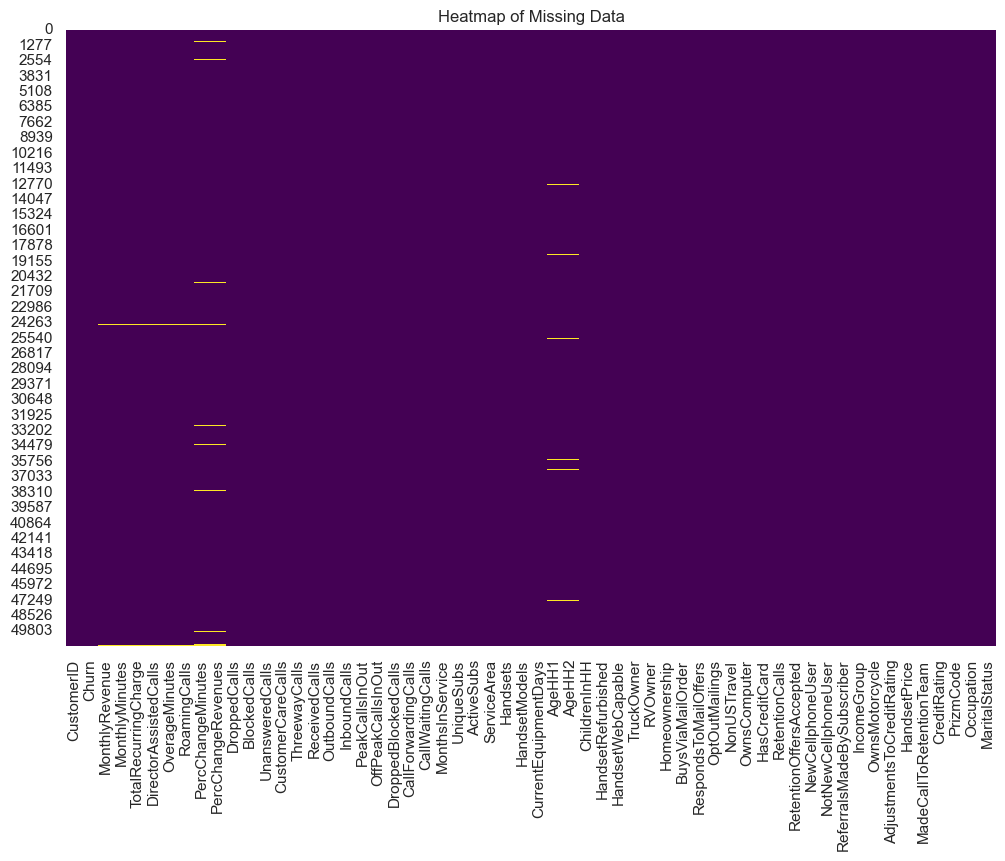

Missing Values  Percentage
MonthlyRevenue                    156    0.305601
MonthlyMinutes                    156    0.305601
TotalRecurringCharge              156    0.305601
DirectorAssistedCalls             156    0.305601
OverageMinutes                    156    0.305601
RoamingCalls                      156    0.305601
PercChangeMinutes                 367    0.718945
PercChangeRevenues                367    0.718945
ServiceArea                        24    0.047015
Handsets                            1    0.001959
HandsetModels                       1    0.001959
CurrentEquipmentDays                1    0.001959
AgeHH1                            909    1.780712
AgeHH2                            909    1.780712

In [40]:
# Check for missing data
import matplotlib.pyplot as plt
import seaborn as sns

# Checking for missing data numerically
missing_data = telecom_data.isnull().sum()
missing_percentage = (missing_data / len(telecom_data)) * 100

# Displaying missing data summary
missing_data_summary = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
missing_data_summary = missing_data_summary[missing_data_summary['Missing Values'] > 0]

# Plotting heatmap of missing data
plt.figure(figsize=(12, 8))
sns.heatmap(telecom_data.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of Missing Data")
plt.show()

# Display missing data numerically
missing_data_summary


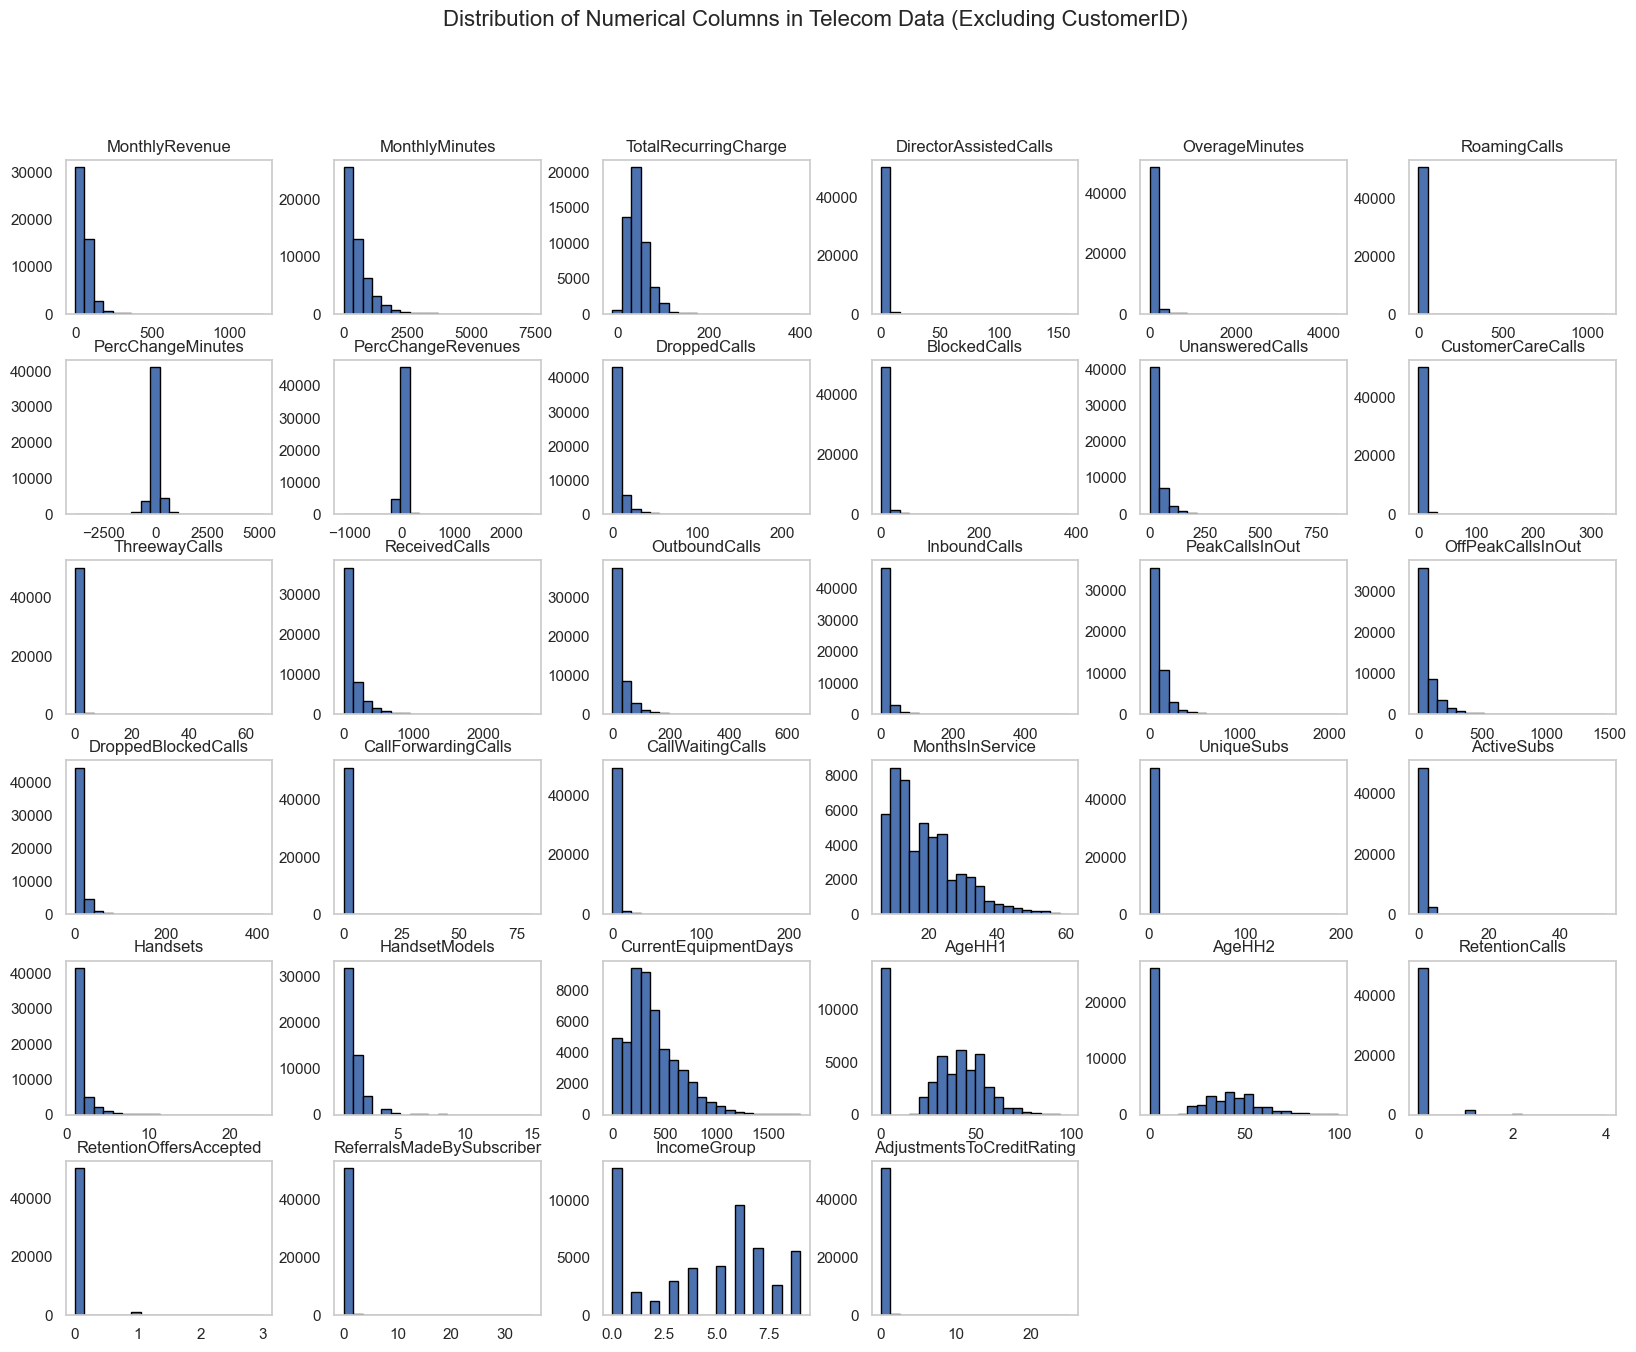

In [41]:
import matplotlib.pyplot as plt

# Exclude 'CustomerID' column and plot histograms for remaining numerical columns
axes = telecom_data.drop(columns='CustomerID').hist(figsize=(20, 15), bins=20, edgecolor='black')

# Loop through each axis to disable the grid
for ax in axes.flatten():
    ax.grid(False)  # Remove the grid for each subplot

# Add the title
plt.suptitle('Distribution of Numerical Columns in Telecom Data (Excluding CustomerID)', fontsize=16)
plt.show()


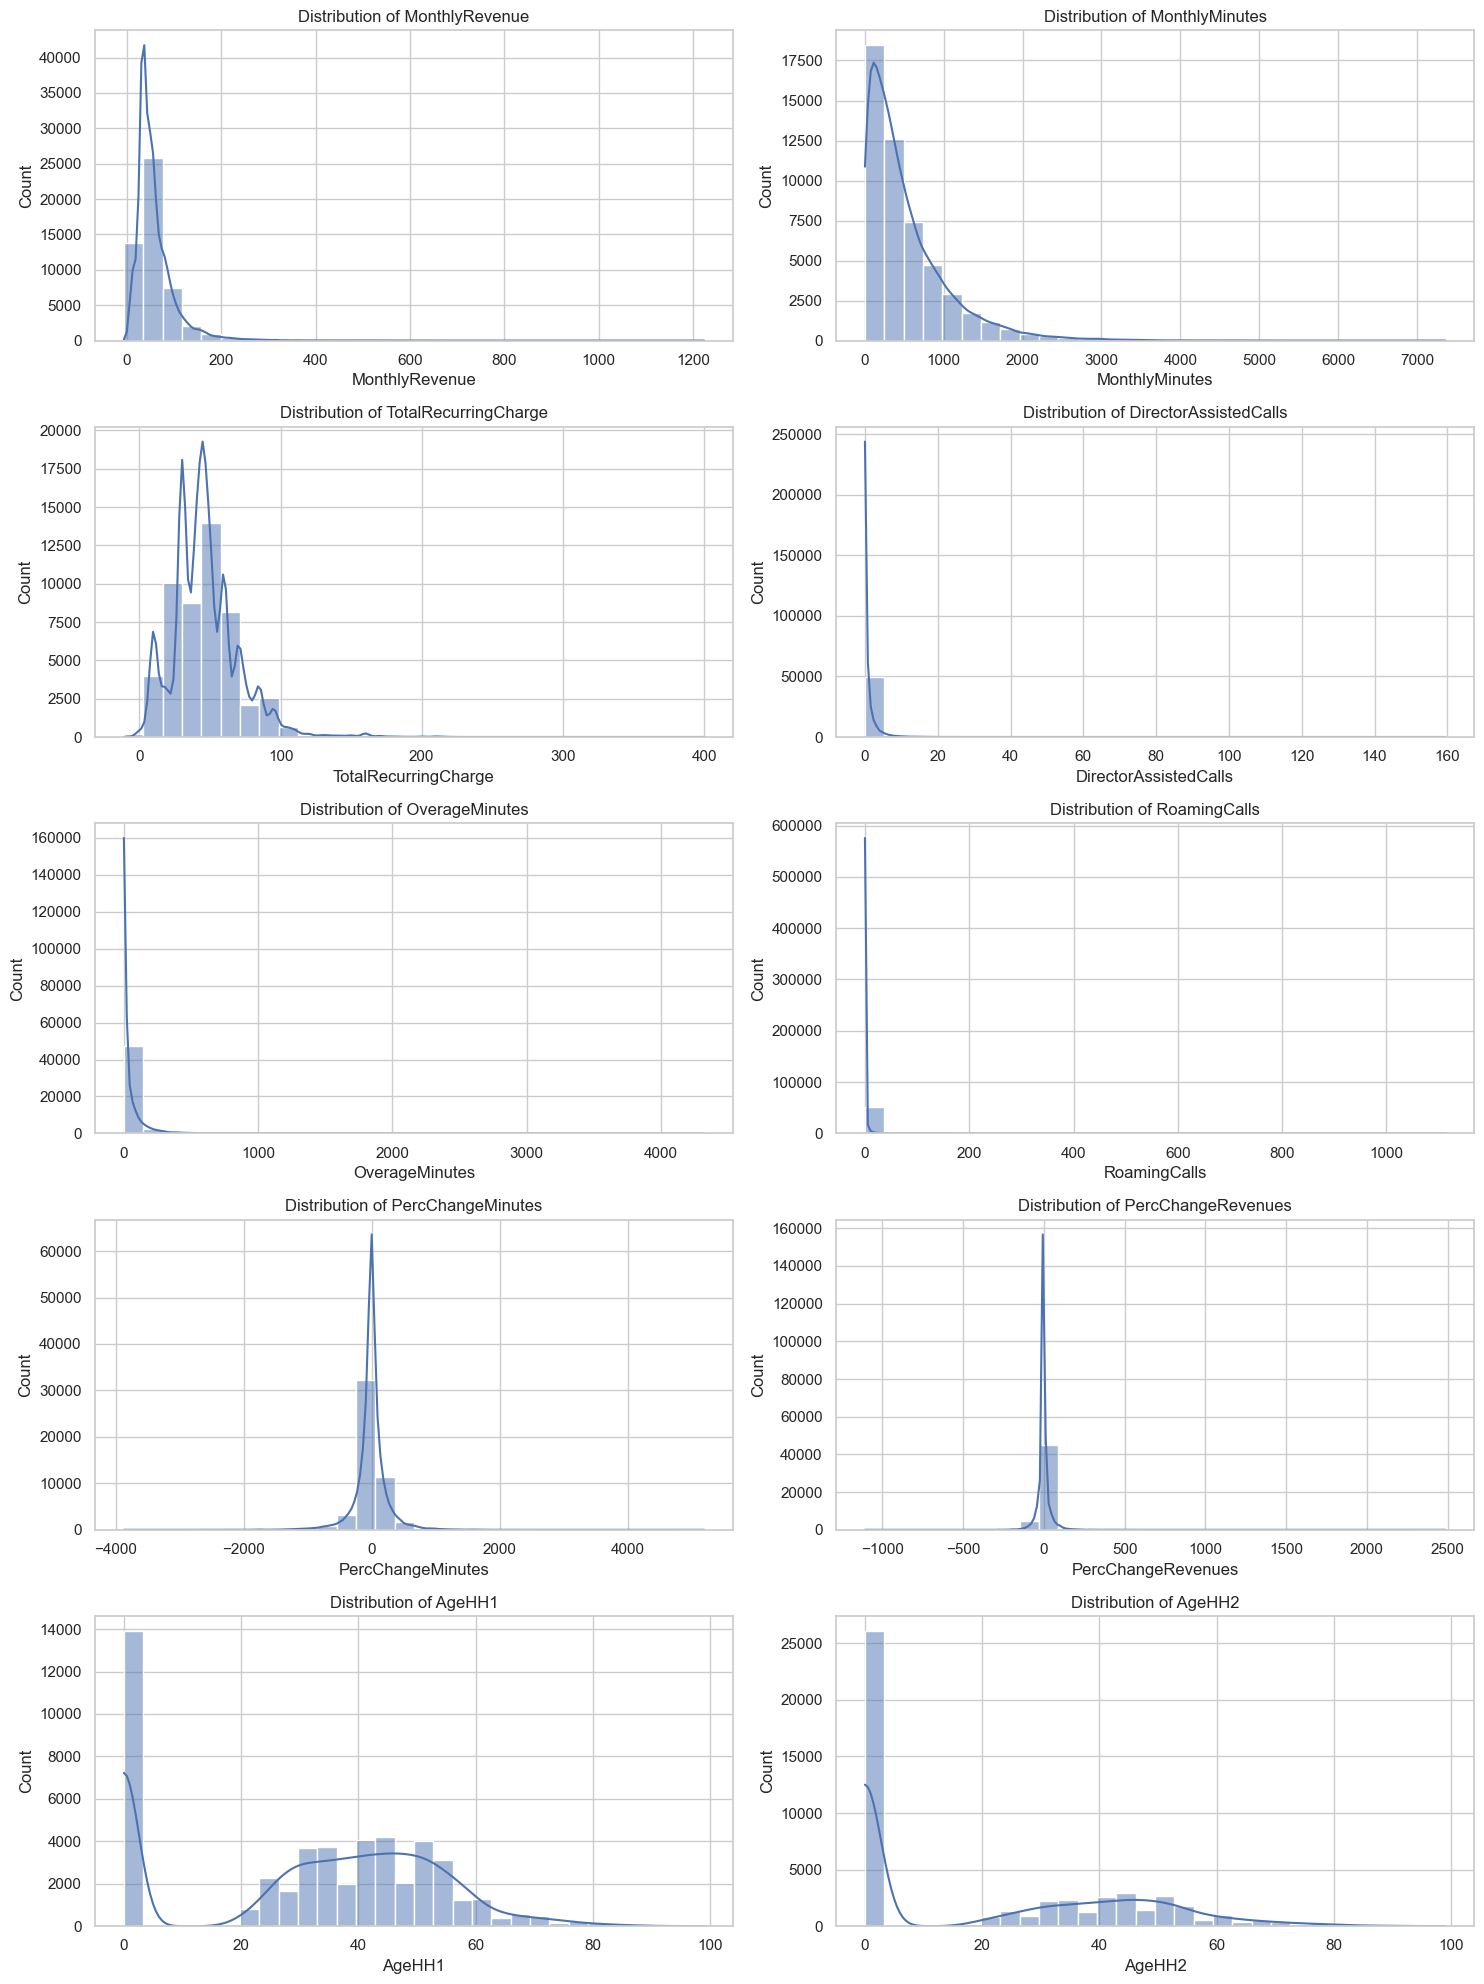

In [42]:
# Print the distribution
# Importing necessary libraries for plotting distributions
numerical_columns_with_missing = ['MonthlyRevenue', 'MonthlyMinutes',       'TotalRecurringCharge', 
                                  'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 
                                  'PercChangeMinutes', 'PercChangeRevenues', 'AgeHH1', 'AgeHH2']

# Plotting distributions of numerical columns with missing values
plt.figure(figsize=(15, 20))

for i, column in enumerate(numerical_columns_with_missing, 1):
    plt.subplot(5, 2, i)
    sns.histplot(telecom_data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


The distribution analysis of the numerical columns with missing values reveals several important patterns. For columns like MonthlyRevenue, MonthlyMinutes, and TotalRecurringCharge, the data is heavily skewed to the right, indicating that the majority of customers have relatively low values, with a few outliers showing much higher amounts. Similarly, columns such as DirectorAssistedCalls, OverageMinutes, and RoamingCalls are highly concentrated around zero, suggesting that most customers rarely use these services, with only a small number of individuals exhibiting much higher usage. In contrast, the columns PercChangeMinutes and PercChangeRevenues show sharp, narrow distributions with significant outliers, implying that most customers experience minor changes in usage and revenue, but a few have large fluctuations. Finally, the age-related columns, AgeHH1 and AgeHH2, follow a more normal distribution, though AgeHH2 (which could represent the second household member) is skewed towards younger ages. Given the presence of skewed distributions and outliers in most columns, median imputation is an appropriate choice to handle missing values, as it is more resistant to the effects of outliers compared to mean imputation. Therefore, proceeding with median imputation ensures the missing data is handled in a robust manner that aligns with the underlying distributions.

In [43]:
# Handling missing values in numerical columns using median imputation
# Selecting numerical columns with missing values
numerical_columns = telecom_data.select_dtypes(include=[np.number]).columns

# Imputing missing values with the median of each column
telecom_data[numerical_columns] = telecom_data[numerical_columns].apply(lambda x: x.fillna(x.median()))

# Verifying if missing values have been handled
missing_data_after_imputation = telecom_data.isnull().sum()
missing_data_after_imputation[numerical_columns]


CustomerID                   0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
AgeHH2                       0
RetentionCalls               0
RetentionOffersAccepted      0
Referral

In [44]:
# For categorical columns:
# Selecting categorical columns and checking for missing values
categorical_columns = telecom_data.select_dtypes(include=['object','category']).columns
missing_categorical_data = telecom_data[categorical_columns].isnull().sum()
missing_categorical_data = missing_categorical_data[missing_categorical_data > 0]

# Display missing categorical data summary
missing_categorical_data


ServiceArea    24
dtype: int64

C:\Users\lenovo\AppData\Local\Temp\ipykernel_18168\3244871821.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=telecom_data, x=col, ax=axes[i], palette="Set2")
C:\Users\lenovo\AppData\Local\Temp\ipykernel_18168\3244871821.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=telecom_data, x=col, ax=axes[i], palette="Set2")
C:\Users\lenovo\AppData\Local\Temp\ipykernel_18168\3244871821.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=telecom_data, x=col, ax=axes[i], palette="Set2")
C:\Users\lenovo\AppData\Local\Temp

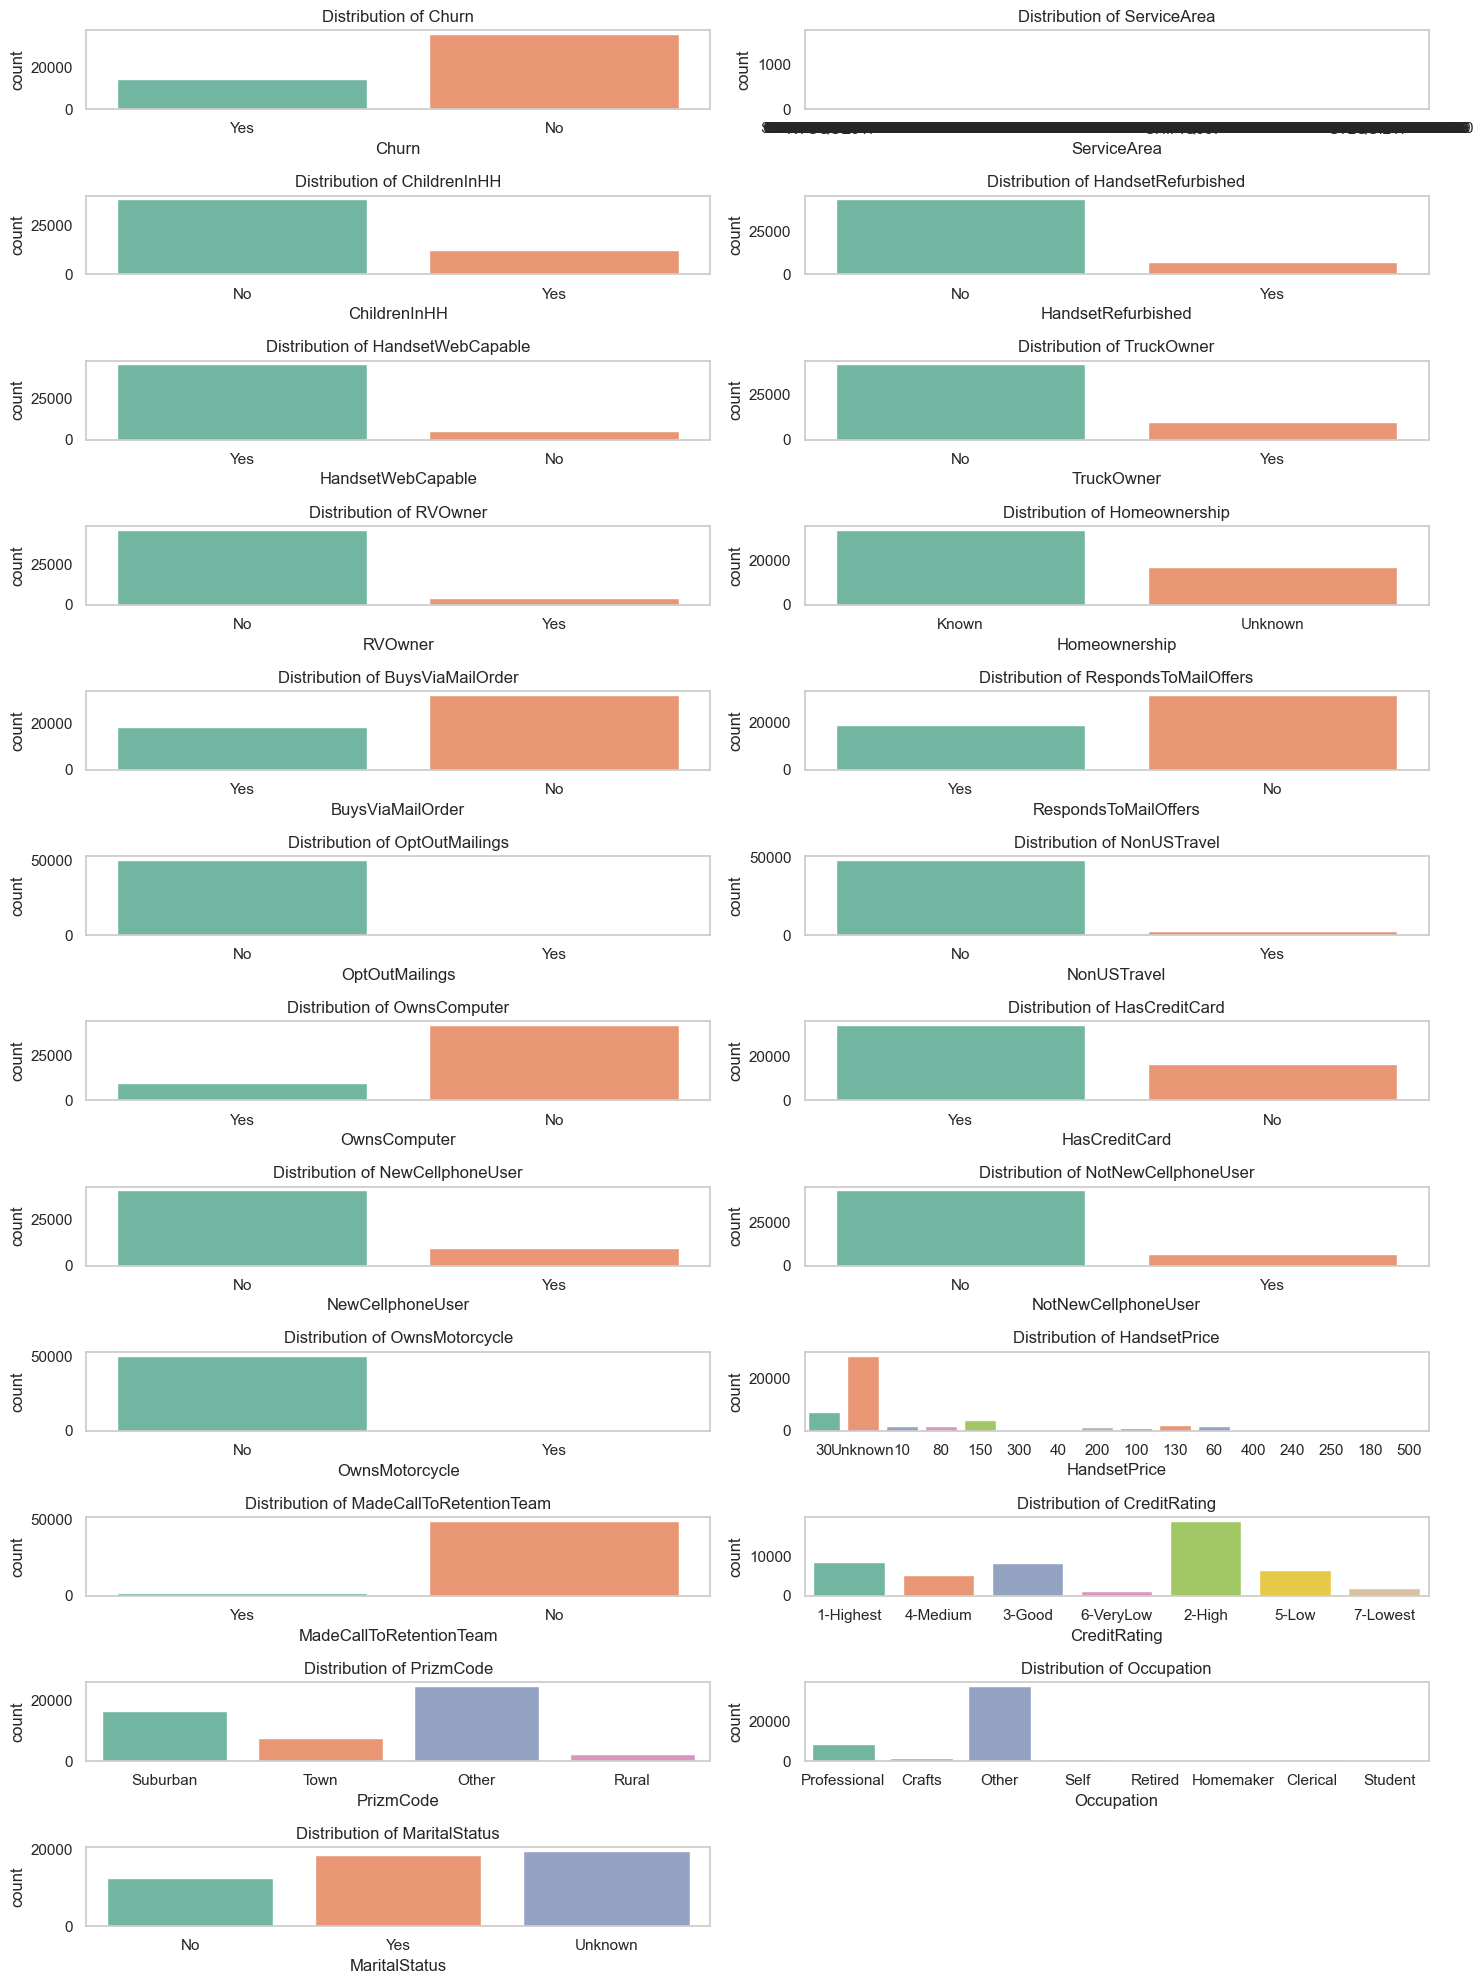

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select categorical columns, excluding 'ServiceArea'
categorical_columns = telecom_data.select_dtypes(include=['object', 'category']).columns
#categorical_columns = categorical_columns.drop('ServiceArea')  # Exclude 'ServiceArea'

# Create subplots for each categorical column
fig, axes = plt.subplots(len(categorical_columns) // 2 + 1, 2, figsize=(15, 20))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Loop through categorical columns and plot bar plots
for i, col in enumerate(categorical_columns):
    sns.countplot(data=telecom_data, x=col, ax=axes[i], palette="Set2")
    axes[i].set_title(f'Distribution of {col}')
    axes[i].grid(False)  # Remove the grid for each subplot

# Remove any extra subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add a global title
#plt.suptitle('Distribution of Categorical Columns in Telecom Data (Excluding ServiceArea)', fontsize=16)
plt.tight_layout()
plt.show()


In [47]:
telecom_data.ServiceArea

0        SEAPOR503
1        PITHOM412
2        MILMIL414
3        PITHOM412
4        OKCTUL918
           ...    
51042    LAXSFN818
51043    LAXCDG310
51044    LAXCDG310
51045    NEVPOW619
51046    NEVPOW619
Name: ServiceArea, Length: 51047, dtype: object

Given the missing values in the ServiceArea column and the highly skewed distribution of the data, I have decided to drop the rows where the ServiceArea is missing. Since imputation of these values may not be logical without a clear basis for determining which area to assign to each missing entry, it could introduce inaccuracies or bias into the analysis. Moreover, because the number of missing values is relatively small (only 24 rows), dropping these records will have a minimal impact on the overall dataset. This approach ensures that we avoid any potential errors that could arise from incorrect imputation of this critical geographic variable.

In [48]:
telecom_data_cleaned = telecom_data.dropna()

In [49]:
telecom_data_cleaned

CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0         3000002   Yes           24.00           219.0                  22.0   
1         3000010   Yes           16.99            10.0                  17.0   
2         3000014    No           38.00             8.0                  38.0   
3         3000022    No           82.28          1312.0                  75.0   
4         3000026   Yes           17.14             0.0                  17.0   
...           ...   ...             ...             ...                   ...   
51042     3399958   Yes           48.46           366.0                  45.0   
51043     3399974    No           95.17          1745.0                  85.0   
51044     3399978   Yes           48.46           366.0                  45.0   
51045     3399990    No           48.46           366.0                  45.0   
51046     3399994    No           48.46           366.0                  45.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                       0.25             0.0           0.0             -157.0   
1                       0.00             0.0           0.0               -4.0   
2                       0.00             0.0           0.0               -2.0   
3                       1.24             0.0           0.0              157.0   
4                       0.00             0.0           0.0                0.0   
...                      ...             ...           ...                ...   
51042                   0.25             3.0           0.0               -5.0   
51043                   0.99            45.0           4.7              122.0   
51044                   0.25             3.0           0.0               -5.0   
51045                   0.25             3.0           0.0               -5.0   
51046                   0.25             3.0           0.0               -5.0   

       PercChangeRevenues  ...  ReferralsMadeBySubscriber  IncomeGroup  \
0                   -19.0  ...                          0            4   
1                     0.0  ...                          0            5   
2                     0.0  ...                          0            6   
3                     8.1  ...                          0            6   
4                    -0.2  ...                          0            9   
...                   ...  ...                        ...          ...   
51042                -0.3  ...                          0            6   
51043                15.9  ...                          0            9   
51044                -0.3  ...                          0            7   
51045                -0.3  ...                          0            9   
51046                -0.3  ...                          0            0   

       OwnsMotorcycle  AdjustmentsToCreditRating  HandsetPrice  \
0                  No                          0            30   
1                  No                          0            30   
2                  No                          0       Unknown   
3                  No                          0            10   
4                  No                          1            10   
...               ...                        ...           ...   
51042              No                          0            60   
51043              No                          1            60   
51044              No                          1            80   
51045              No                          0            30   
51046              No                          1            60   

       MadeCallToRetentionTeam  CreditRating  PrizmCode    Occupation  \
0                          Yes     1-Highest   Suburban  Professional   
1                           No      4-Medium   Suburban  Professional   
2                           No        3-Good       Town        Crafts   
3                           No      4-Medium      Other         Other   
4             

In [50]:
# Checking for any remaining missing values in the entire dataset
missing_data_overall = telecom_data_cleaned.isnull().sum()
missing_data_overall[missing_data_overall > 0]


Series([], dtype: int64)

# Detect outlier for numerical columns

In [52]:
# import numpy as np
# from scipy import stats

# # Select only numeric columns from the DataFrame
# numeric_columns = telecom_data_cleaned.select_dtypes(include=[np.number]).columns

# # Calculate the Z-scores for numeric columns only
# z_scores = np.abs(stats.zscore(telecom_data_cleaned[numeric_columns]))

# # Define a threshold for what is considered an outlier (e.g., Z > 3)
# threshold = 3

# # Filter the DataFrame, keeping only rows where all Z-scores are below the threshold
# telecom_data_cleaned = telecom_data_cleaned[(z_scores < threshold).all(axis=1)]

# # Reset the index of the filtered DataFrame
# telecom_data_cleaned = telecom_data_cleaned.reset_index(drop=True)

# # Show the DataFrame without outliers
# telecom_data_cleaned


In [53]:
telecom_data_cleaned.RetentionCalls.describe()

count    51023.000000
mean         0.037199
std          0.206486
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: RetentionCalls, dtype: float64

C:\Users\lenovo\AppData\Local\Temp\ipykernel_18168\955337851.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telecom_data_cleaned['Churn'] = telecom_data_cleaned['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)


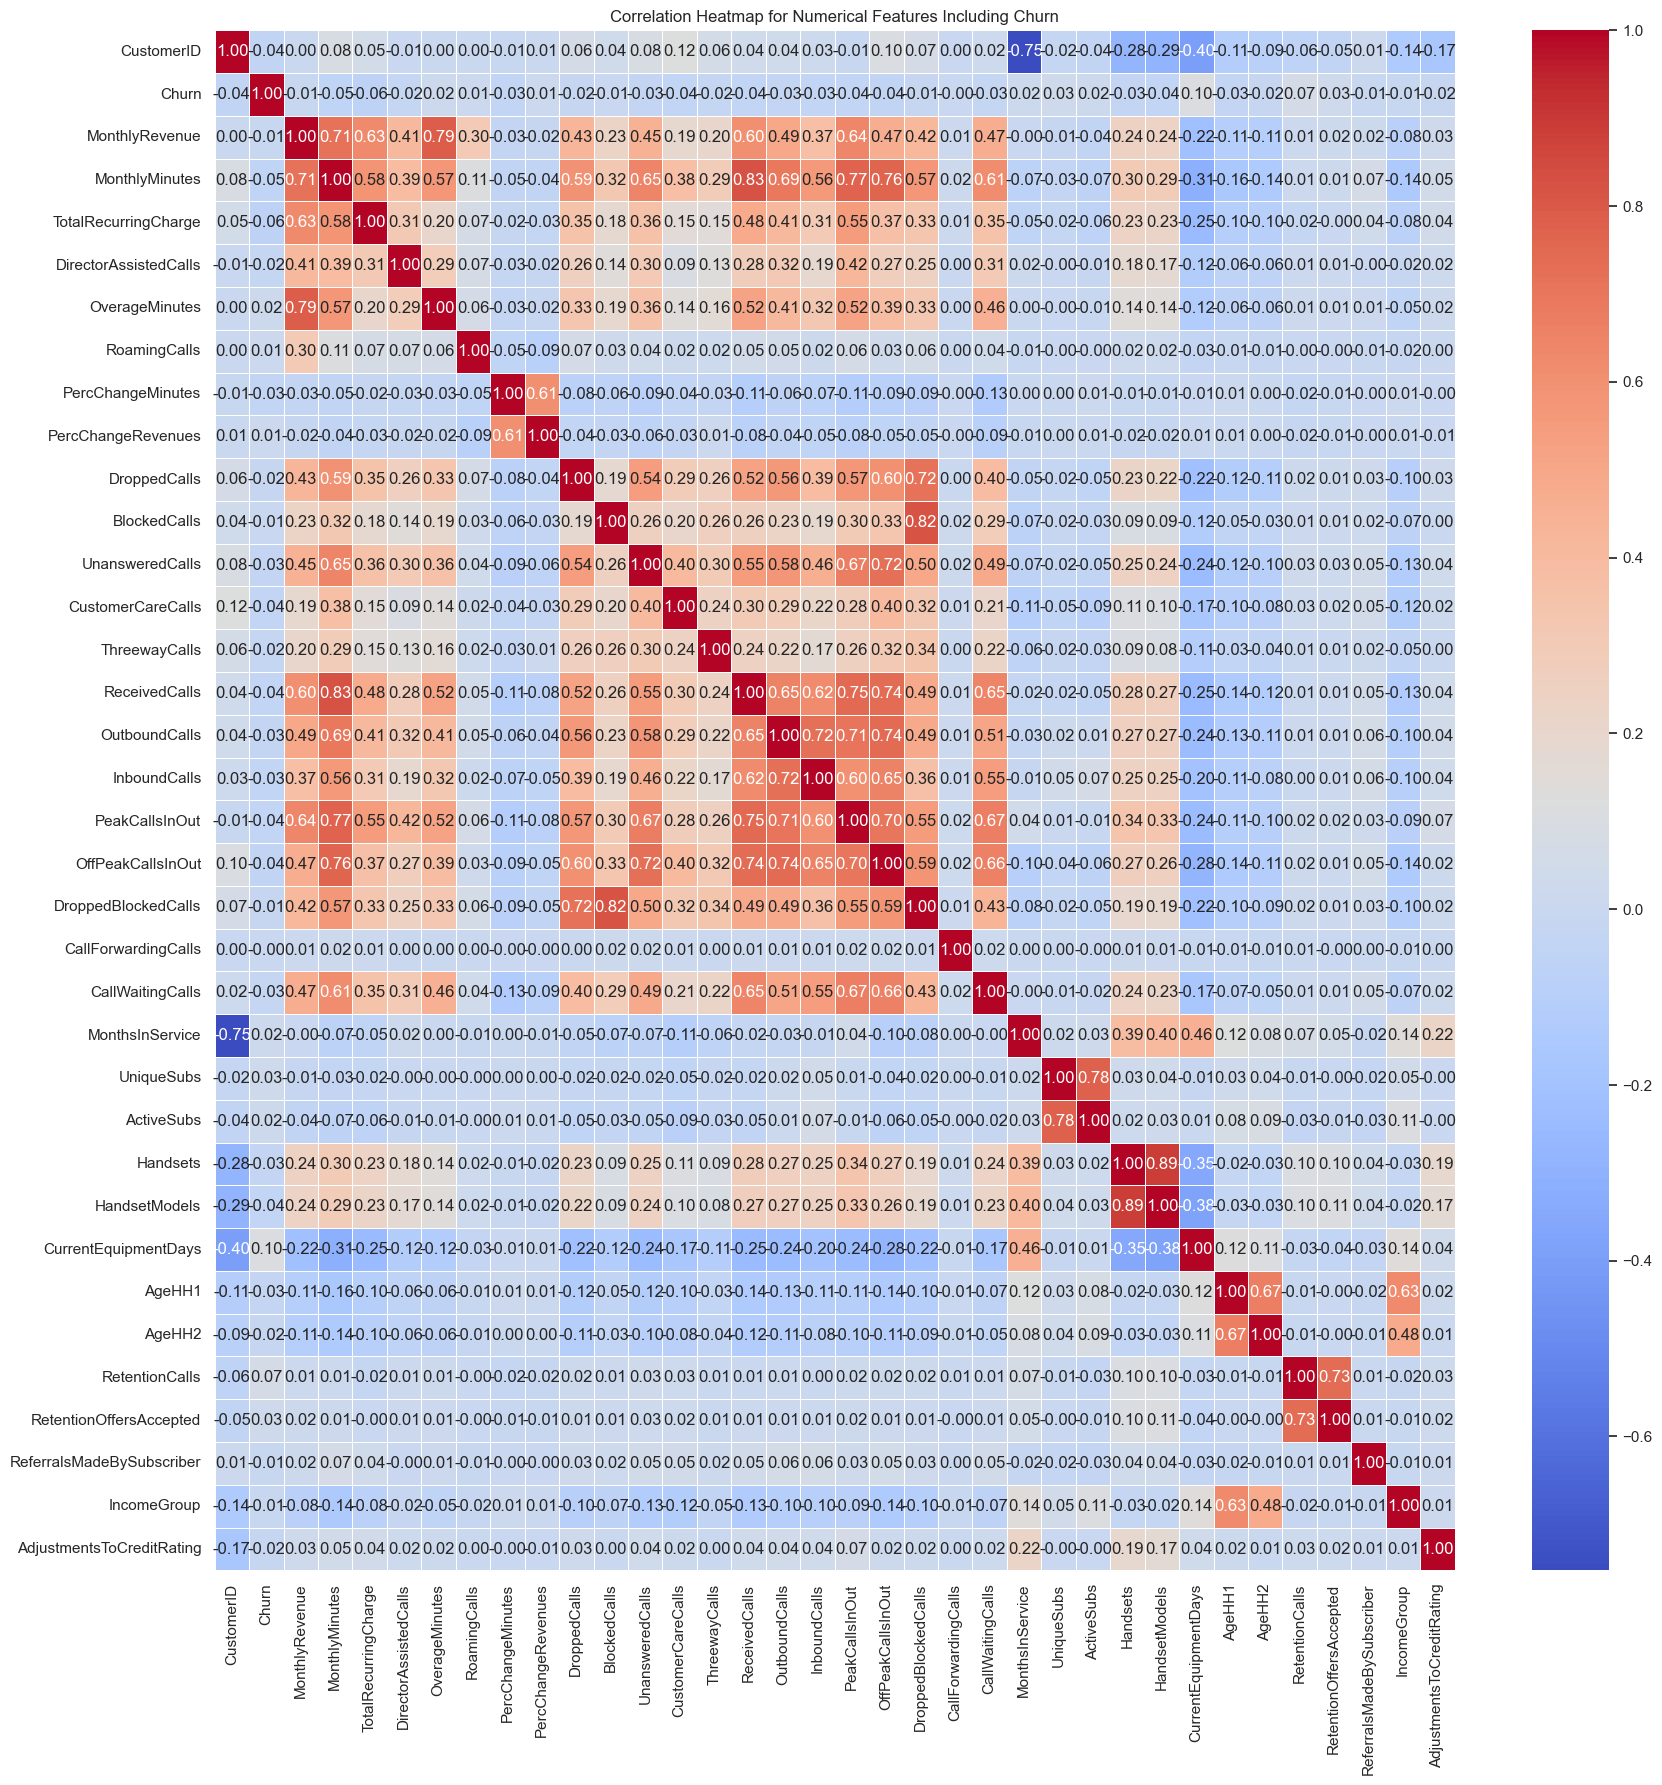

In [54]:
import numpy as np
# Encoding the 'Churn' column to perform correlation analysis (Yes=1, No=0)
telecom_data_cleaned['Churn'] = telecom_data_cleaned['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Selecting only the numerical columns for correlation analysis
numerical_data = telecom_data_cleaned.select_dtypes(include=[np.number])

# Adding the encoded churn column to the numerical data
numerical_data['Churn'] = telecom_data_cleaned['Churn']

# Calculating the correlation matrix
correlation_matrix = numerical_data.corr()

# Extracting correlation values with 'Churn_Encoded'
correlation_with_churn = correlation_matrix['Churn'].sort_values(ascending=False)

# Displaying the correlations with 'Churn_Encoded'

# Plotting a heatmap for the correlation matrix including 'Churn_Encoded'
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap for Numerical Features Including Churn")
plt.show()


In [55]:
telecom_data_cleaned.Churn.describe()

count    51023.000000
mean         0.288086
std          0.452876
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Churn, dtype: float64

The overall weak correlations imply that churn is not driven by any single numerical factor. Instead, churn behavior is likely influenced by a combination of small effects from various features or non-numerical aspects, such as customer behavior, satisfaction, or external factors not captured by the numerical data.

identify and visualize the highly correlated features in the dataset and suggest which ones can be dropped or combined. 

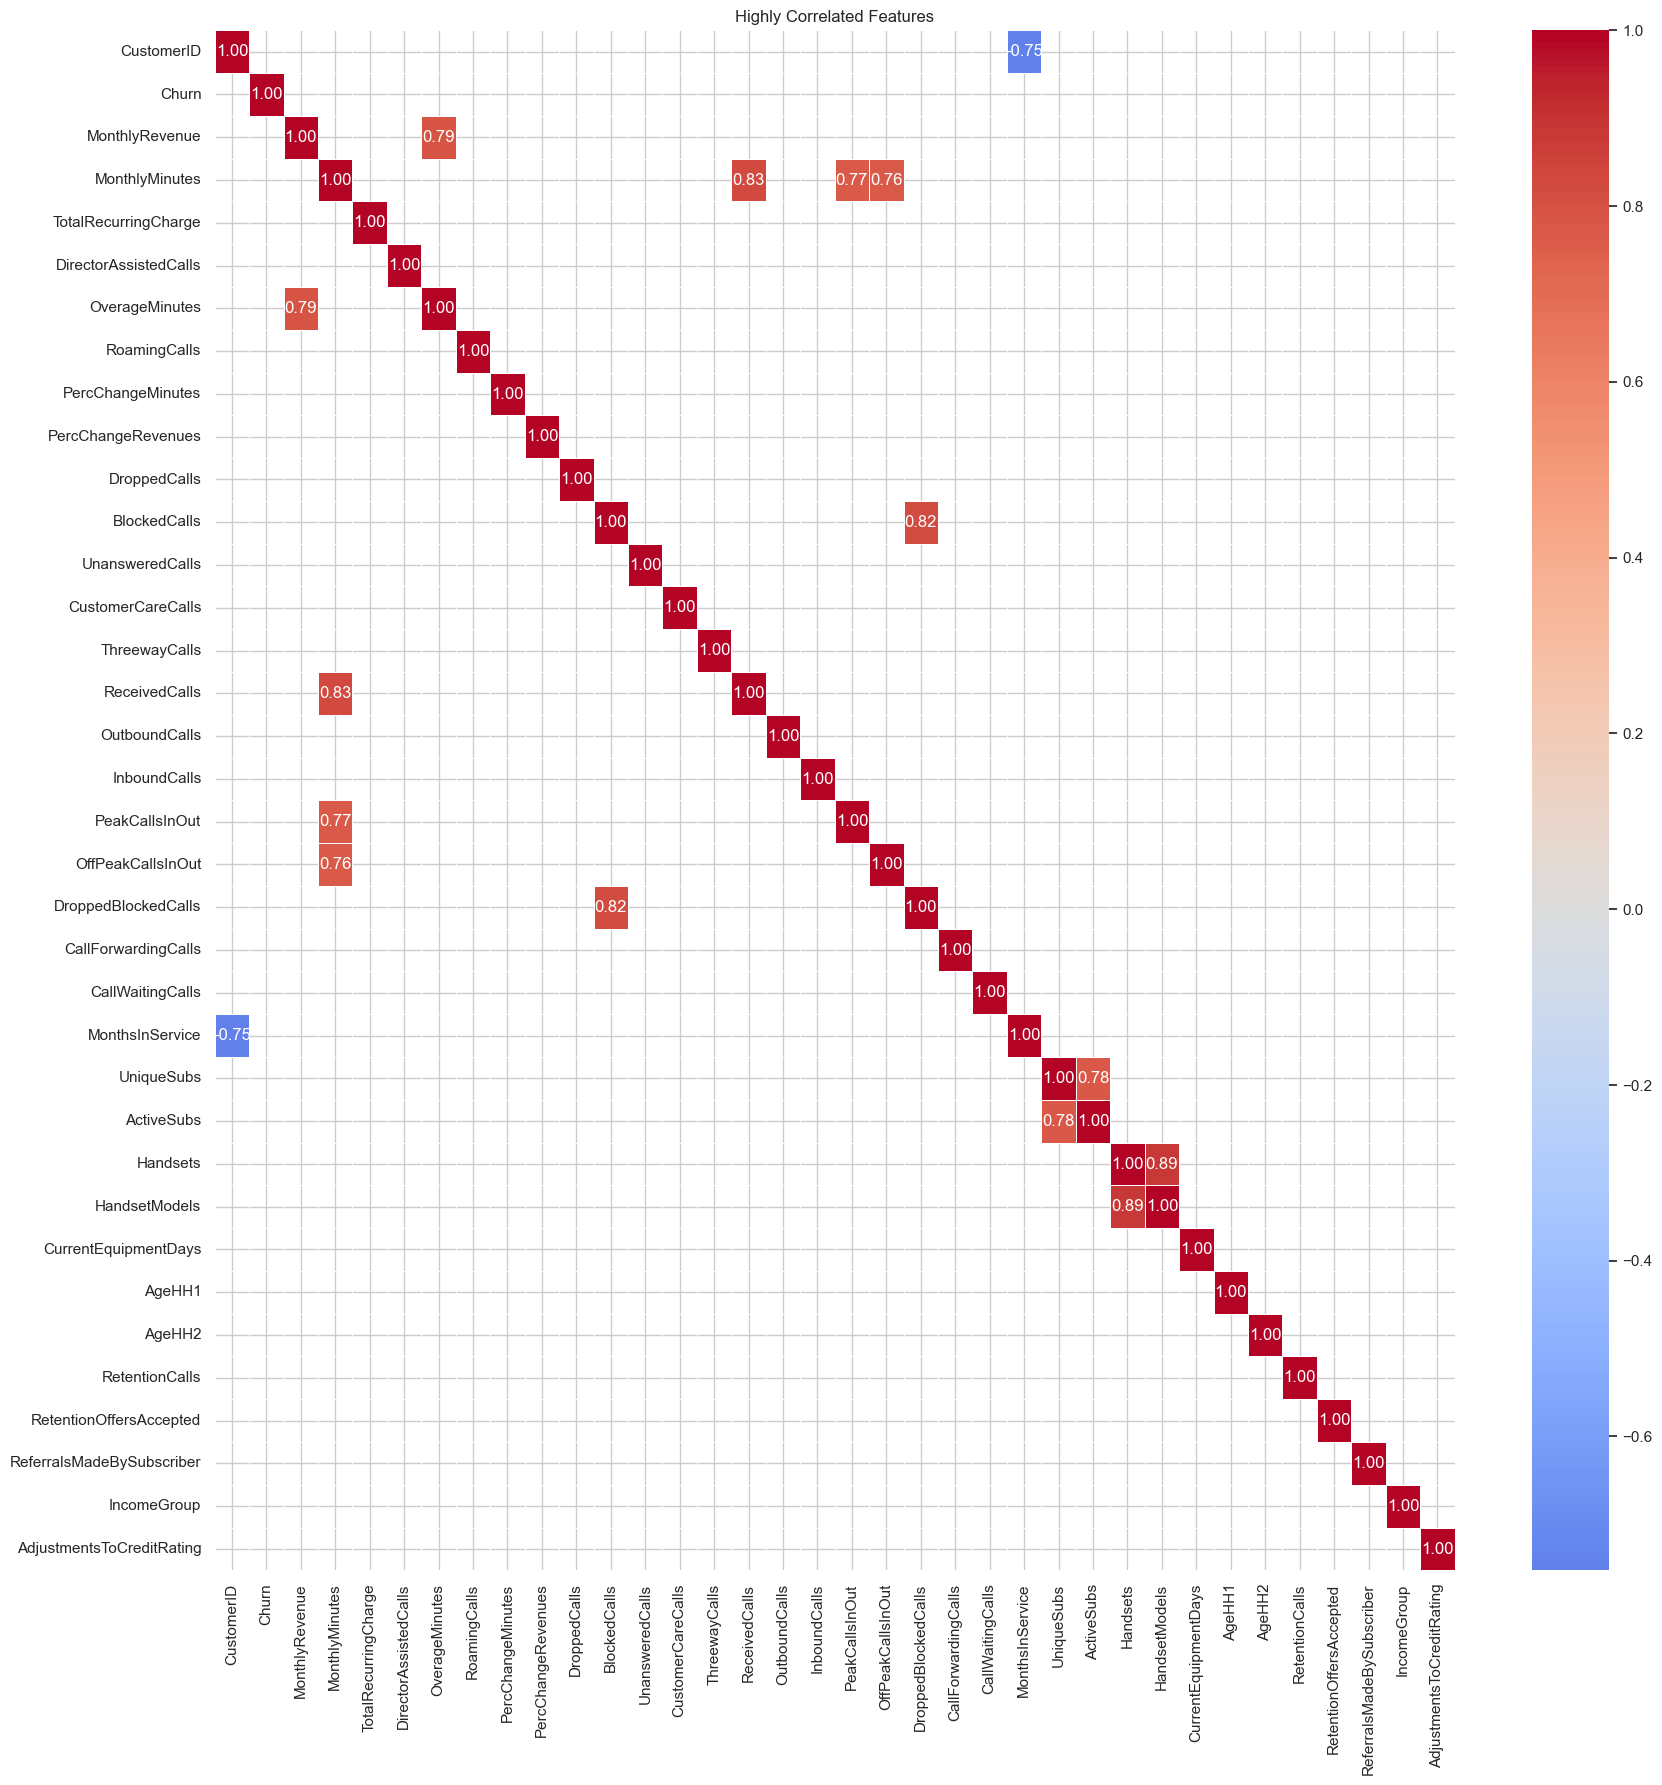

In [56]:
# Visualizing highly correlated features in the dataset
import numpy as np
# First, setting a correlation threshold (e.g., above 0.8 or below -0.8) for high correlations
correlation_threshold = 0.75

# Extracting the correlation matrix for the numerical data
correlation_matrix = numerical_data.corr()

# Masking the correlation matrix lower triangle and filtering for highly correlated features
high_correlation = correlation_matrix[(correlation_matrix > correlation_threshold) | (correlation_matrix < -correlation_threshold)]

# Visualizing only the highly correlated features
plt.figure(figsize=(20, 20))
sns.heatmap(high_correlation, annot=True, fmt='.2f', cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Highly Correlated Features")
plt.show()



In [57]:
# Creating a matrix for highly correlated pairs based on the threshold (0.75)
correlation_threshold = 0.75
highly_correlated_matrix = correlation_matrix[(correlation_matrix > correlation_threshold) | (correlation_matrix < -correlation_threshold)]

# Removing self-correlations (correlation of a feature with itself)
highly_correlated_matrix = highly_correlated_matrix.where(np.triu(np.ones(highly_correlated_matrix.shape), k=1).astype(bool))

# Displaying the highly correlated matrix as a table format
highly_correlated_matrix.dropna(how='all', axis=0).dropna(how='all', axis=1)  # Removing rows and columns with all NaN values



OverageMinutes  ReceivedCalls  PeakCallsInOut  \
CustomerID                 NaN            NaN             NaN   
MonthlyRevenue        0.787854            NaN             NaN   
MonthlyMinutes             NaN       0.828008         0.77034   
BlockedCalls               NaN            NaN             NaN   
UniqueSubs                 NaN            NaN             NaN   
Handsets                   NaN            NaN             NaN   

                OffPeakCallsInOut  DroppedBlockedCalls  MonthsInService  \
CustomerID                    NaN                  NaN        -0.752286   
MonthlyRevenue                NaN                  NaN              NaN   
MonthlyMinutes           0.763835                  NaN              NaN   
BlockedCalls                  NaN             0.816267              NaN   
UniqueSubs                    NaN                  NaN              NaN   
Handsets                      NaN                  NaN              NaN   

                ActiveSubs  HandsetModels  
CustomerID             NaN            NaN  
MonthlyRevenue         NaN            NaN  
MonthlyMinutes         NaN            NaN  
BlockedCalls           NaN            NaN  
UniqueSubs        0.775716            NaN  
Handsets               NaN       0.887848

In [58]:
# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Set a correlation threshold (e.g., 0.75)
correlation_threshold = 0.75

# Identify highly correlated pairs
highly_correlated_pairs = correlation_matrix.unstack().sort_values(ascending=False)
highly_correlated_pairs = highly_correlated_pairs[(highly_correlated_pairs > correlation_threshold) & (highly_correlated_pairs < 1)]

# Display the results
print(highly_correlated_pairs)


HandsetModels        Handsets               0.887848
Handsets             HandsetModels          0.887848
MonthlyMinutes       ReceivedCalls          0.828008
ReceivedCalls        MonthlyMinutes         0.828008
BlockedCalls         DroppedBlockedCalls    0.816267
DroppedBlockedCalls  BlockedCalls           0.816267
MonthlyRevenue       OverageMinutes         0.787854
OverageMinutes       MonthlyRevenue         0.787854
UniqueSubs           ActiveSubs             0.775716
ActiveSubs           UniqueSubs             0.775716
MonthlyMinutes       PeakCallsInOut         0.770340
PeakCallsInOut       MonthlyMinutes         0.770340
OffPeakCallsInOut    MonthlyMinutes         0.763835
MonthlyMinutes       OffPeakCallsInOut      0.763835
dtype: float64


The dataset contains several highly correlated feature pairs, which indicates redundancy in the information they provide. For example, MonthlyRevenue and OverageMinutes have a correlation of 0.79, suggesting that customers with higher overage minutes also tend to spend more. Similarly, MonthlyMinutes is highly correlated with both ReceivedCalls (0.83) and PeakCallsInOut (0.77), indicating overlapping information about customer usage. Features like BlockedCalls and DroppedBlockedCalls (0.82), UniqueSubs and ActiveSubs (0.78), as well as Handsets and HandsetModels (0.89), also show strong correlations.

To avoid redundancy and multicollinearity in any further analysis, we recommend dropping one feature from each highly correlated pair. Specifically, OverageMinutes, ReceivedCalls, PeakCallsInOut, DroppedBlockedCalls, UniqueSubs, and HandsetModels can be dropped, as their corresponding highly correlated counterparts (e.g., MonthlyRevenue, MonthlyMinutes, BlockedCalls, ActiveSubs, and Handsets) already capture the necessary information. Additionally, since CustomerID is simply an identifier with no analytical value, it should be removed. By doing so, the dataset will become more streamlined, reducing complexity without losing key insights.

In [59]:
# Remove redundance data from telecom_data_cleaned
columns_to_drop = ['OverageMinutes', 'ReceivedCalls', 'PeakCallsInOut', 'DroppedBlockedCalls', 
                   'UniqueSubs', 'HandsetModels', 'CustomerID']

# Drop the specified columns
telecom_data_cleaned= telecom_data_cleaned.drop(columns=columns_to_drop)

In [60]:
telecom_data_cleaned

Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0          1           24.00           219.0                  22.0   
1          1           16.99            10.0                  17.0   
2          0           38.00             8.0                  38.0   
3          0           82.28          1312.0                  75.0   
4          1           17.14             0.0                  17.0   
...      ...             ...             ...                   ...   
51042      1           48.46           366.0                  45.0   
51043      0           95.17          1745.0                  85.0   
51044      1           48.46           366.0                  45.0   
51045      0           48.46           366.0                  45.0   
51046      0           48.46           366.0                  45.0   

       DirectorAssistedCalls  RoamingCalls  PercChangeMinutes  \
0                       0.25           0.0             -157.0   
1                       0.00           0.0               -4.0   
2                       0.00           0.0               -2.0   
3                       1.24           0.0              157.0   
4                       0.00           0.0                0.0   
...                      ...           ...                ...   
51042                   0.25           0.0               -5.0   
51043                   0.99           4.7              122.0   
51044                   0.25           0.0               -5.0   
51045                   0.25           0.0               -5.0   
51046                   0.25           0.0               -5.0   

       PercChangeRevenues  DroppedCalls  BlockedCalls  ...  \
0                   -19.0           0.7           0.7  ...   
1                     0.0           0.3           0.0  ...   
2                     0.0           0.0           0.0  ...   
3                     8.1          52.0           7.7  ...   
4                    -0.2           0.0           0.0  ...   
...                   ...           ...           ...  ...   
51042                -0.3           9.3           2.7  ...   
51043                15.9          16.7           0.7  ...   
51044                -0.3          71.7           4.3  ...   
51045                -0.3           0.0           0.0  ...   
51046                -0.3          18.7           0.7  ...   

       ReferralsMadeBySubscriber  IncomeGroup  OwnsMotorcycle  \
0                              0            4              No   
1                              0            5              No   
2                              0            6              No   
3                              0            6              No   
4                              0            9              No   
...                          ...          ...             ...   
51042                          0            6              No   
51043                          0            9              No   
51044                          0            7              No   
51045                          0            9              No   
51046                          0            0              No   

       AdjustmentsToCreditRating  HandsetPrice  MadeCallToRetentionTeam  \
0                              0            30                      Yes   
1                              0            30                       No   
2                              0       Unknown                       No   
3                              0            10                       No   
4                              1            10                       No   
...                          ...           ...                      ...   
51042                          0            60                       No   
51043                          1            60                       No   
51044                          1            80                       No   
51045                          0            30                       No   
51046                          1  

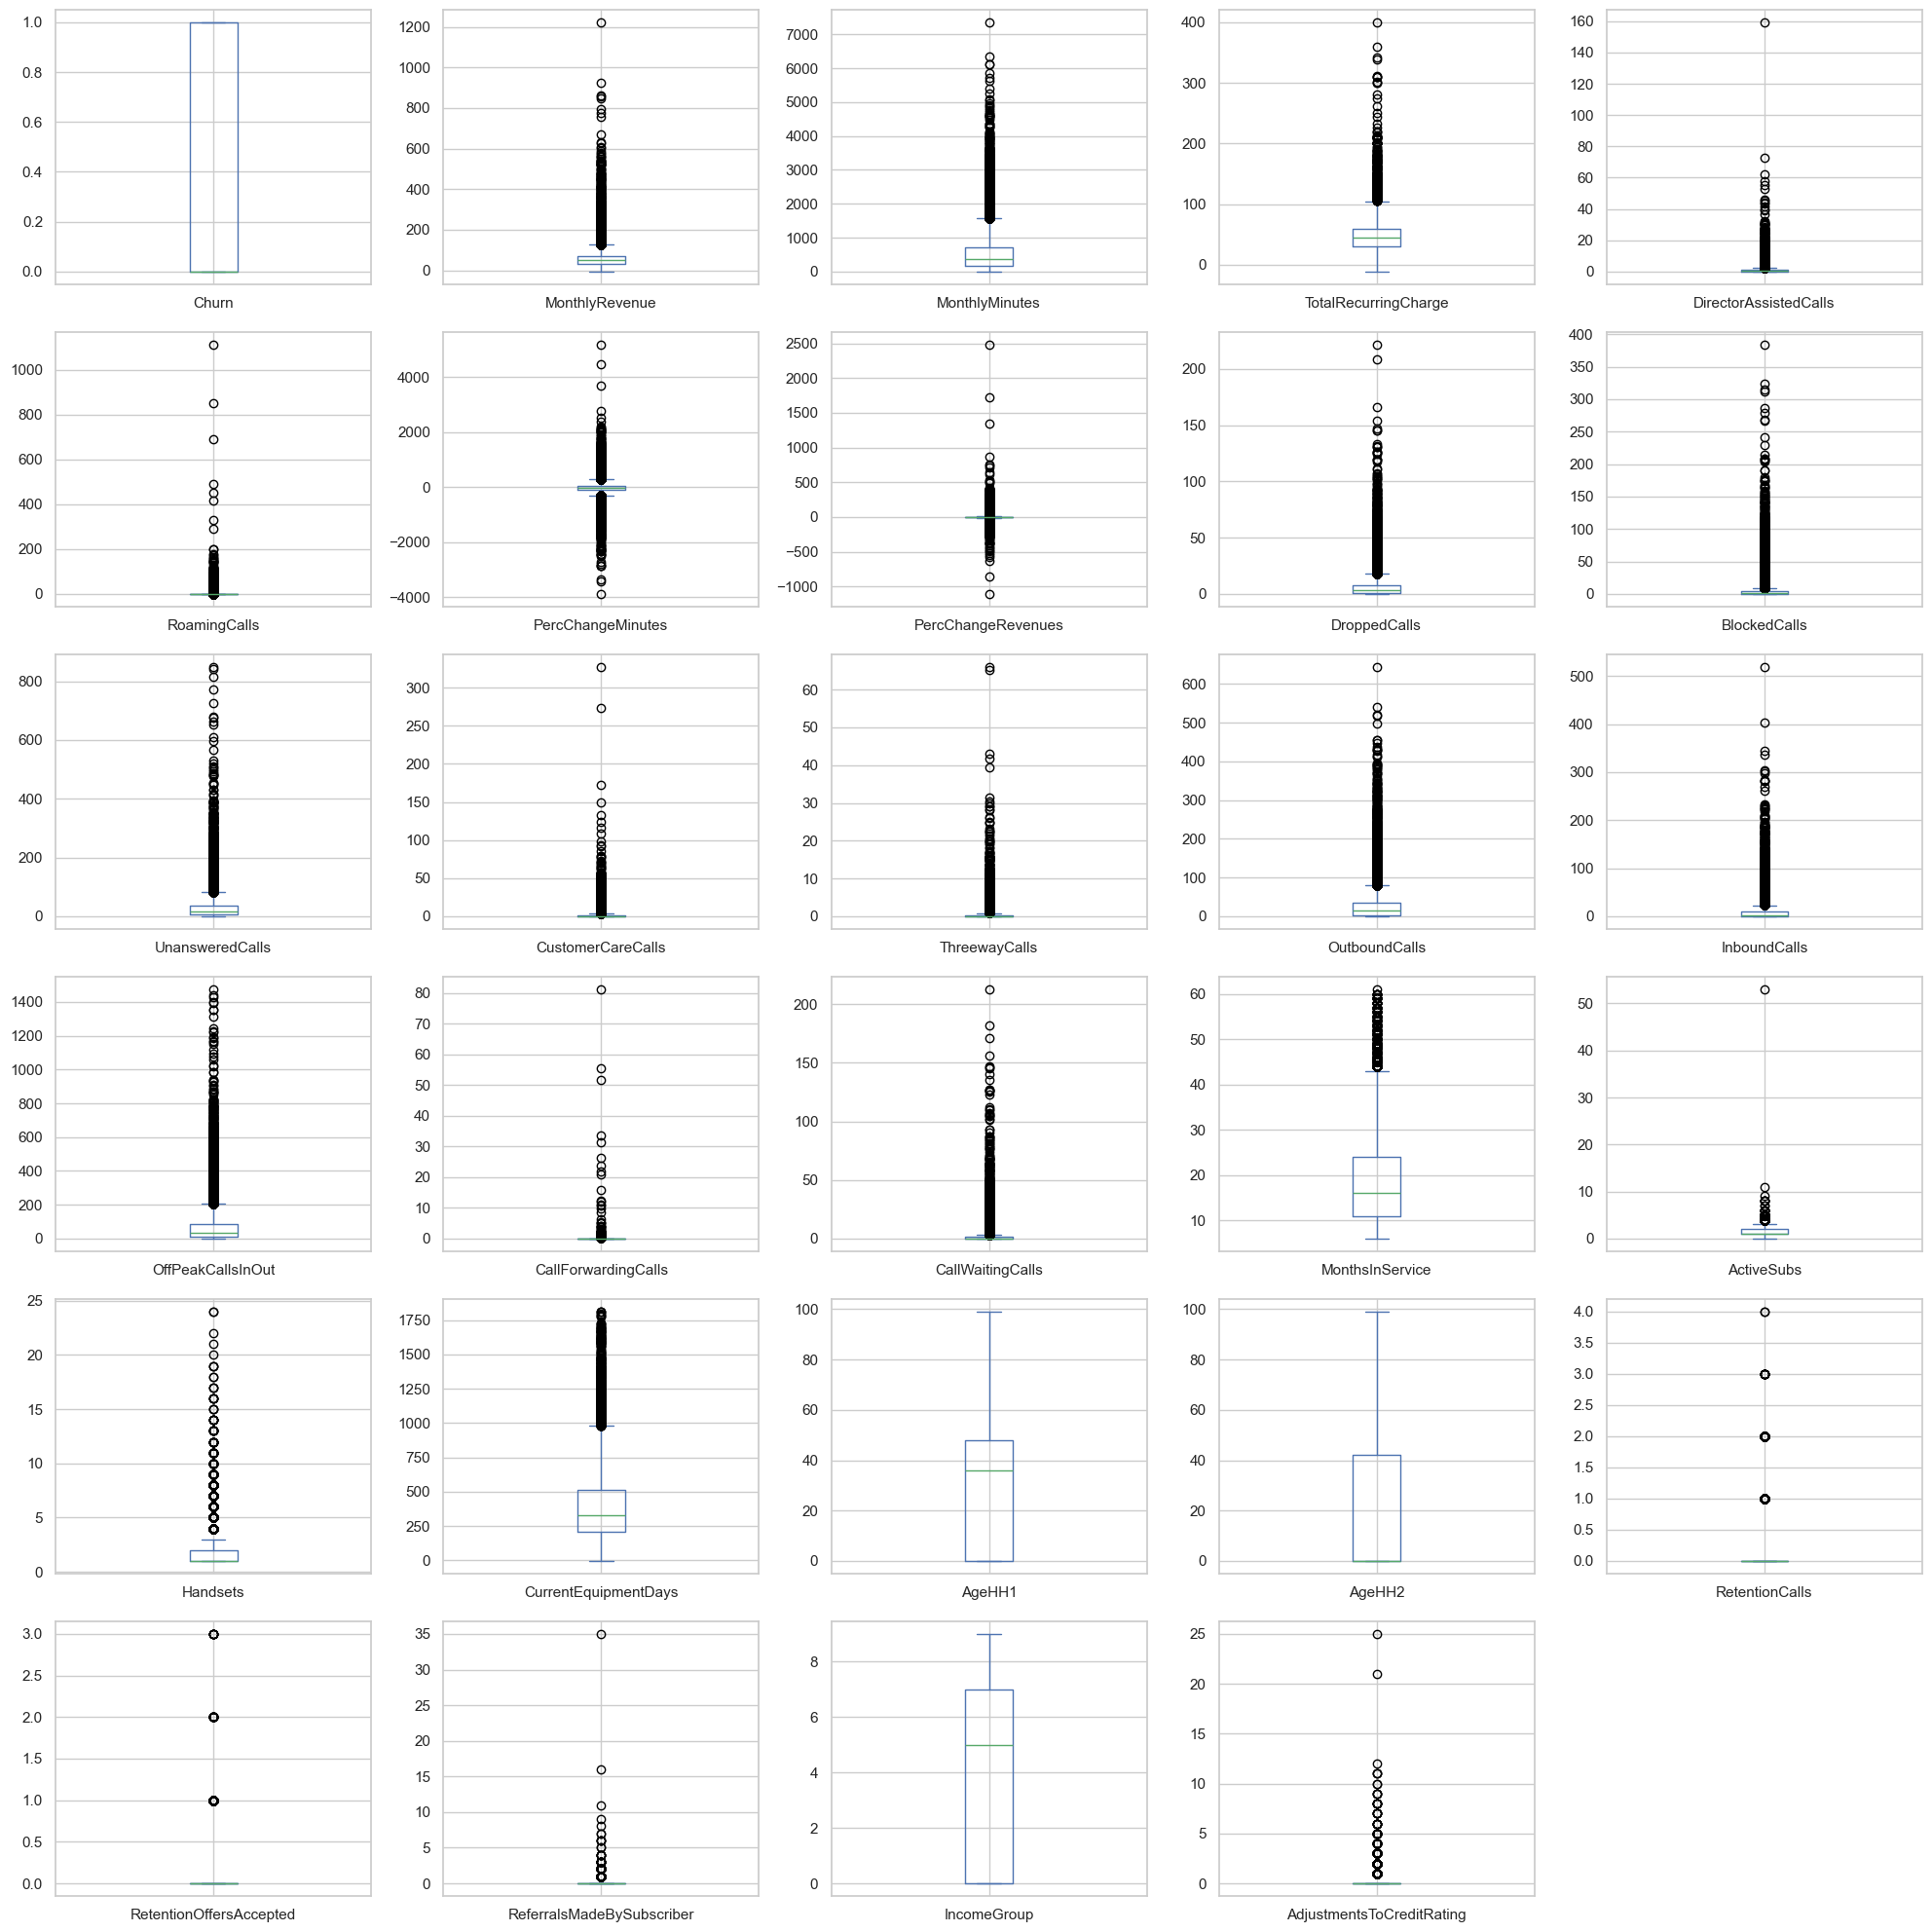

In [61]:
# Select only numeric columns
numeric_columns = telecom_data_cleaned.select_dtypes(include=[np.number]).columns

# Create box plots for each numeric column
telecom_data_cleaned[numeric_columns].plot(kind='box', subplots=True, layout=(6, 5), figsize=(20, 20))

# Display the plots
plt.tight_layout()
plt.show()

from scipy.stats import zscore

numeric_columns = telecom_data_cleaned.select_dtypes(include=[np.number])

# Recalculate z-scores for all numeric columns except 'MadeCallToRetentionTeam'
z_scores = numeric_columns.drop(columns=['RetentionCalls', "RetentionOffersAccepted"]).apply(zscore)

# Exclude outliers from all columns except 'MadeCallToRetentionTeam'
cleaned_telecom_data = telecom_data_cleaned[(z_scores.abs() <= 3).all(axis=1)]


C:\Users\lenovo\AppData\Local\Temp\ipykernel_18292\2599606049.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=telecom_data_cleaned[column], palette='viridis')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_18292\2599606049.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=telecom_data_cleaned[column], palette='viridis')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_18292\2599606049.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=telecom_data_cleaned[column], palette='viridis')
C:\Users\lenovo\AppData\Local\Temp\ipykerne

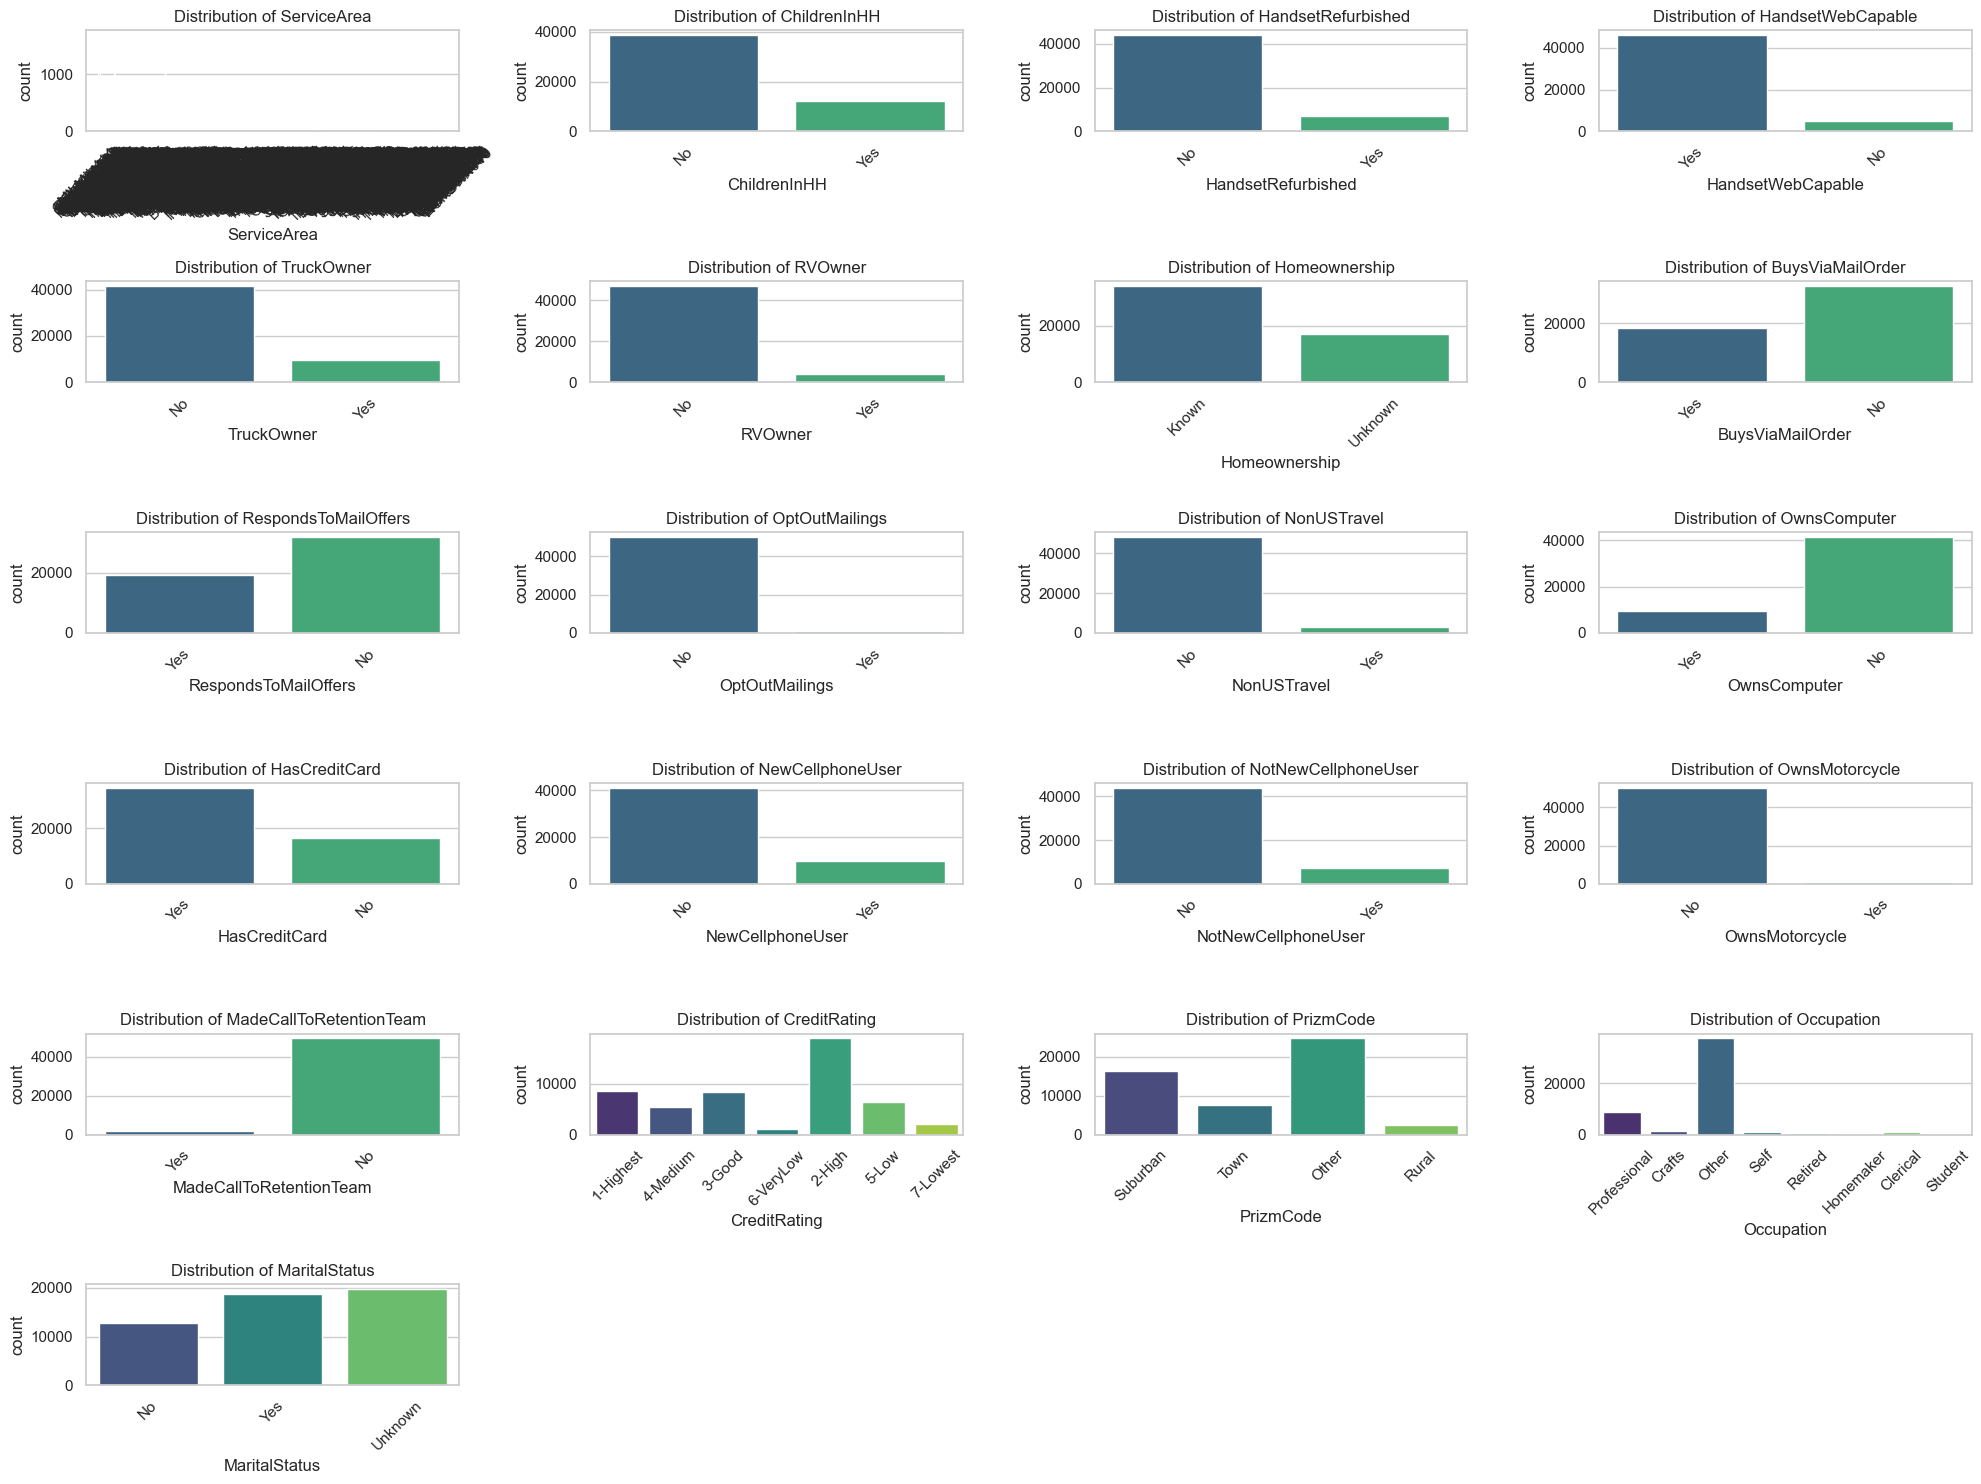

In [144]:
# Extracting categorical columns from the dataset
categorical_columns = cleaned_telecom_data.select_dtypes(include=['object']).columns

# Plotting the distribution of each categorical column
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the figure size for better visibility
plt.figure(figsize=(20, 15))

# Plotting each categorical column's distribution
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(6, 4, i)
    sns.countplot(x=telecom_data_cleaned[column], palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [145]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
import pandas as pd

# Make a copy of the original DataFrame to avoid altering it directly
telecom_data_encoded = cleaned_telecom_data.copy()

# Define the columns to encode or map
multi_class_cols = ["PrizmCode", "Occupation"]
label_encoding_cols = ["CreditRating"]
frequency_encoding_cols = ["ServiceArea"]
mapping = {"Yes": 1, "No": 0, "Known": 1, "Unknown": 0}

# Get the list of categorical columns excluding multi_class_cols, label_encoding_cols, and frequency_encoding_cols
cat_col = telecom_data_encoded.select_dtypes(include=['object']).columns.to_list()
columns_to_map = [col for col in cat_col if col not in (multi_class_cols + label_encoding_cols + frequency_encoding_cols)]

# Apply the mapping to the remaining categorical columns
telecom_data_encoded[columns_to_map] = telecom_data_encoded[columns_to_map].replace(mapping)

# Apply label encoding to label_encoding_cols
label_encoder = LabelEncoder()
for col in label_encoding_cols:
    telecom_data_encoded[col] = label_encoder.fit_transform(telecom_data_encoded[col])

# Apply one-hot encoding to multi_class_cols, converting True/False to 0/1
telecom_data_encoded = pd.get_dummies(telecom_data_encoded, columns=multi_class_cols, dtype='int')

# Apply frequency encoding to frequency_encoding_cols
for col in frequency_encoding_cols:
    freq_encoding = telecom_data_encoded[col].value_counts(normalize=True)
    telecom_data_encoded[col] = telecom_data_encoded[col].map(freq_encoding)

# Now perform chi-square tests on the encoded data
# Initializing a DataFrame to store chi-square results
chi2_results = []

# Loop through each remaining categorical column to perform chi-square test with 'Churn'
for column in telecom_data_encoded.columns:
    if column != 'Churn':  # Skipping the target variable
        # Creating a contingency table for the chi-square test
        contingency_table = pd.crosstab(telecom_data_encoded[column], telecom_data_encoded['Churn'])
        
        # Performing the chi-square test
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        # Storing the results
        chi2_results.append((column, chi2, p))

# Converting results to a DataFrame
chi2_results_df = pd.DataFrame(chi2_results, columns=['Column', 'Chi2', 'P-Value'])

# Sorting by P-Value to see significance
chi2_results_df = chi2_results_df.sort_values(by='P-Value')

# Display the chi-square results
chi2_results_df


C:\Users\lenovo\AppData\Local\Temp\ipykernel_18292\1756826781.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telecom_data_encoded[columns_to_map] = telecom_data_encoded[columns_to_map].replace(mapping)


Column         Chi2        P-Value
17            MonthsInService  1269.614797  9.710568e-239
21       CurrentEquipmentDays  2477.261389  3.737889e-100
2        TotalRecurringCharge   467.112396   1.489028e-41
45    MadeCallToRetentionTeam   166.078864   5.316662e-38
36             RetentionCalls   168.601430   2.087456e-35
26          HandsetWebCapable   147.448488   6.261673e-34
46               CreditRating   138.104769   2.516719e-27
5           PercChangeMinutes  1887.969810   9.444778e-18
25         HandsetRefurbished    48.200794   3.847325e-12
10          CustomerCareCalls   148.559748   1.808319e-11
37    RetentionOffersAccepted    46.367159   4.738329e-10
31       RespondsToMailOffers    31.891184   1.630555e-08
22                     AgeHH1   108.993265   2.621259e-08
30           BuysViaMailOrder    30.884434   2.738595e-08
20                   Handsets    40.222089   3.893983e-08
18                 ActiveSubs    29.800536   1.520022e-06
19                ServiceArea   276.355972   2.543085e-06
7                DroppedCalls   173.632373   5.283144e-06
44               HandsetPrice    36.934480   1.183267e-05
1              MonthlyMinutes  2034.581175   1.215679e-05
13               InboundCalls   258.605732   3.282227e-05
11              ThreewayCalls    33.254256   4.784908e-04
29              Homeownership    10.718906   1.060463e-03
3       DirectorAssistedCalls    74.640549   1.428447e-03
4                RoamingCalls   347.592844   1.496250e-03
16           CallWaitingCalls    89.505606   2.257600e-03
0              MonthlyRevenue  9968.098635   4.293096e-03
57         Occupation_Retired     8.059719   4.526020e-03
9             UnansweredCalls   505.108537   6.545884e-03
41                IncomeGroup    22.298291   7.980183e-03
49            PrizmCode_Rural     7.025008   8.037912e-03
55           Occupation_Other     5.588759   1.807610e-02
6          PercChangeRevenues  2089.297951   2.029019e-02
12              OutboundCalls   434.365185   3.571717e-02
23                     AgeHH2    54.689349   3.890483e-02
39        NotNewCellphoneUser     3.388977   6.563364e-02
35              HasCreditCard     3.222942   7.261300e-02
50         PrizmCode_Suburban     3.025262   8.197707e-02
56    Occupation_Professional     2.800238   9.425031e-02
47              MaritalStatus     2.552999   1.100851e-01
38           NewCellphoneUser     2.311247   1.284410e-01
8                BlockedCalls   126.102516   1.398021e-01
27                 TruckOwner     2.012988   1.559579e-01
24               ChildrenInHH     1.929176   1.648486e-01
43  AdjustmentsToCreditRating     1.742066   1.868772e-01
51             PrizmCode_Town     1.688850   1.937526e-01
14          OffPeakCallsInOut   972.006401   2.493608e-01
15        CallForwardingCalls     6.260808   2.816620e-01
28                    RVOwner     1.067207   3.015772e-01
34               OwnsComputer     0.845719   3.577662e-01
33                NonUSTravel     0.805502   3.694536e-01
58            Occupation_Self     0.791761   3.735682e-01
54       Occupation_Homemaker     0.484042   4.865972e-01
42             OwnsMotorcycle     0.403333   5.253730e-01
48            PrizmCode_Other     0.220214   6.388770e-01
59         Occupation_Student     0.177554   6.734835e-01
53          Occupation_Crafts     0.067301   7.953085e-01
32             OptOutMailings     0.063815   8.005649e-01
52        Occupation_Clerical     0.019483   8.889909e-01
40  ReferralsMadeBySubscriber     0.000000   1.000000e+00

Based on the chi-square test results, the following columns have p-values greater than 0.05, indicating no significant relationship with the target variable and are candidates for removal.

In [147]:
# Filter the columns that have a P-value larger than 0.05
columns_to_drop = chi2_results_df[chi2_results_df['P-Value'] > 0.05]['Column'].tolist()
columns_to_drop.append("ServiceArea")
# Drop those columns from the telecom_data_encoded dataframe
telecom_data_encoded_filtered = telecom_data_encoded.drop(columns=columns_to_drop)

# Display the columns that were removed
columns_to_drop

['NotNewCellphoneUser',
 'HasCreditCard',
 'PrizmCode_Suburban',
 'Occupation_Professional',
 'MaritalStatus',
 'NewCellphoneUser',
 'BlockedCalls',
 'TruckOwner',
 'ChildrenInHH',
 'AdjustmentsToCreditRating',
 'PrizmCode_Town',
 'OffPeakCallsInOut',
 'CallForwardingCalls',
 'RVOwner',
 'OwnsComputer',
 'NonUSTravel',
 'Occupation_Self',
 'Occupation_Homemaker',
 'OwnsMotorcycle',
 'PrizmCode_Other',
 'Occupation_Student',
 'Occupation_Crafts',
 'OptOutMailings',
 'Occupation_Clerical',
 'ReferralsMadeBySubscriber',
 'ServiceArea']

In [148]:
telecom_data_encoded_filtered.dtypes

Churn                        int64
MonthlyRevenue             float64
MonthlyMinutes             float64
TotalRecurringCharge       float64
DirectorAssistedCalls      float64
RoamingCalls               float64
PercChangeMinutes          float64
PercChangeRevenues         float64
DroppedCalls               float64
UnansweredCalls            float64
CustomerCareCalls          float64
ThreewayCalls              float64
OutboundCalls              float64
InboundCalls               float64
CallWaitingCalls           float64
MonthsInService              int64
ActiveSubs                   int64
Handsets                   float64
CurrentEquipmentDays       float64
AgeHH1                     float64
AgeHH2                     float64
HandsetRefurbished           int64
HandsetWebCapable            int64
Homeownership                int64
BuysViaMailOrder             int64
RespondsToMailOffers         int64
RetentionCalls               int64
RetentionOffersAccepted      int64
IncomeGroup         

In [149]:
churn_rate = telecom_data_encoded_filtered['Churn'].mean()
churn_rate

0.2915445264328313

In [150]:
telecom_data_cleaned = telecom_data_encoded_filtered

In [151]:
telecom_data_cleaned

Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
148        0           83.50          1130.0                  75.0   
156        0           35.30           307.0                  35.0   
167        0           32.02           362.0                  32.0   
172        0          111.39           767.0                  75.0   
175        1           38.17           214.0                  30.0   
...      ...             ...             ...                   ...   
51040      0           71.99           724.0                  70.0   
51041      1          117.49           384.0                  30.0   
51042      1           48.46           366.0                  45.0   
51043      0           95.17          1745.0                  85.0   
51045      0           48.46           366.0                  45.0   

       DirectorAssistedCalls  RoamingCalls  PercChangeMinutes  \
148                     0.00           0.3               90.0   
156                     0.00           0.0              204.0   
167                     0.25           0.0               38.0   
172                     7.42           0.0             -243.0   
175                     0.00           0.0              202.0   
...                      ...           ...                ...   
51040                   0.00           0.9              -40.0   
51041                   0.00           0.0                0.0   
51042                   0.25           0.0               -5.0   
51043                   0.99           4.7              122.0   
51045                   0.25           0.0               -5.0   

       PercChangeRevenues  DroppedCalls  UnansweredCalls  ...  \
148                  10.0           3.0             18.0  ...   
156                  -0.3           1.0             24.3  ...   
167                  -1.2           2.3             18.7  ...   
172                   2.7           8.0             23.3  ...   
175                  14.6           1.3             18.3  ...   
...                   ...           ...              ...  ...   
51040                -2.0          14.3             23.3  ...   
51041                 0.0           4.0             27.0  ...   
51042                -0.3           9.3             48.3  ...   
51043                15.9          16.7             41.3  ...   
51045                -0.3           0.0              0.0  ...   

       RespondsToMailOffers  RetentionCalls  RetentionOffersAccepted  \
148                       0               0                        0   
156                       0               0                        0   
167                       1               0                        0   
172                       0               1                        1   
175                       1               0                        0   
...                     ...             ...                      ...   
51040                     1               0                        0   
51041                     0               0                        0   
51042                     1               0                        0   
51043                     1               0                        0   
51045                     0               0                        0   

       IncomeGroup  HandsetPrice  MadeCallToRetentionTeam  CreditRating  \
148              0          10.0                        0             0   
156              6          30.0                        0             0   
167              9          30.0                        0             0   
172              5          10.0                        1             0   
175              1          10.0                        0             2   
...            ...           ...                      ...           ...   
51040            7          60.0                        0             0   
51041            2          30.0                        0             4   
51042            6          60.0                        0       

In [152]:
telecom_data_cleaned.shape

(39572, 35)

In [153]:
# Check for null values in the dataframe
null_values = telecom_data_cleaned.isnull().sum()

# Display the null values for each column
print(null_values)


Churn                      0
MonthlyRevenue             0
MonthlyMinutes             0
TotalRecurringCharge       0
DirectorAssistedCalls      0
RoamingCalls               0
PercChangeMinutes          0
PercChangeRevenues         0
DroppedCalls               0
UnansweredCalls            0
CustomerCareCalls          0
ThreewayCalls              0
OutboundCalls              0
InboundCalls               0
CallWaitingCalls           0
MonthsInService            0
ActiveSubs                 0
Handsets                   0
CurrentEquipmentDays       0
AgeHH1                     0
AgeHH2                     0
HandsetRefurbished         0
HandsetWebCapable          0
Homeownership              0
BuysViaMailOrder           0
RespondsToMailOffers       0
RetentionCalls             0
RetentionOffersAccepted    0
IncomeGroup                0
HandsetPrice               0
MadeCallToRetentionTeam    0
CreditRating               0
PrizmCode_Rural            0
Occupation_Other           0
Occupation_Ret

In [42]:
# Check for null values in the dataframe
null_values = df_scaled.isna().sum()

# Display the null values for each column
print(null_values)


MonthlyRevenue          0
MonthlyMinutes          0
TotalRecurringCharge    0
RoamingCalls            0
PercChangeMinutes       0
PercChangeRevenues      0
DroppedCalls            0
UnansweredCalls         0
CustomerCareCalls       0
ThreewayCalls           0
OutboundCalls           0
InboundCalls            0
CallWaitingCalls        0
MonthsInService         0
ActiveSubs              0
ServiceArea             0
Handsets                0
CurrentEquipmentDays    0
AgeHH1                  0
AgeHH2                  0
HandsetRefurbished      0
HandsetWebCapable       0
Homeownership           0
BuysViaMailOrder        0
RespondsToMailOffers    0
HasCreditCard           0
IncomeGroup             0
HandsetPrice            0
CreditRating            0
PrizmCode_Rural         0
Occupation_Other        0
Occupation_Retired      0
dtype: int64


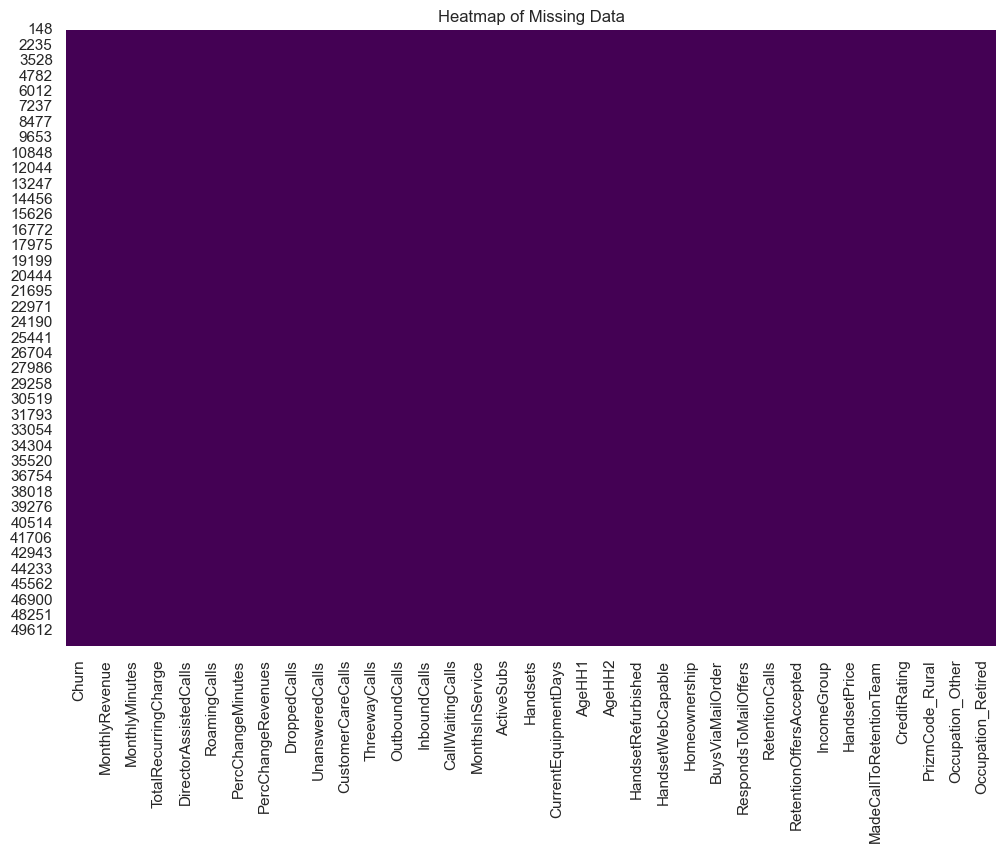

Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []

In [154]:
# Check for missing data
import matplotlib.pyplot as plt
import seaborn as sns

# Checking for missing data numerically
missing_data = telecom_data_cleaned.isnull().sum()
missing_percentage = (missing_data / len(telecom_data_cleaned)) * 100

# Displaying missing data summary
missing_data_summary = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
missing_data_summary = missing_data_summary[missing_data_summary['Missing Values'] > 0]

# Plotting heatmap of missing data
plt.figure(figsize=(12, 8))
sns.heatmap(telecom_data_cleaned.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of Missing Data")
plt.show()

# Display missing data numerically
missing_data_summary


In [155]:
telecom_data_cleaned

Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
148        0           83.50          1130.0                  75.0   
156        0           35.30           307.0                  35.0   
167        0           32.02           362.0                  32.0   
172        0          111.39           767.0                  75.0   
175        1           38.17           214.0                  30.0   
...      ...             ...             ...                   ...   
51040      0           71.99           724.0                  70.0   
51041      1          117.49           384.0                  30.0   
51042      1           48.46           366.0                  45.0   
51043      0           95.17          1745.0                  85.0   
51045      0           48.46           366.0                  45.0   

       DirectorAssistedCalls  RoamingCalls  PercChangeMinutes  \
148                     0.00           0.3               90.0   
156                     0.00           0.0              204.0   
167                     0.25           0.0               38.0   
172                     7.42           0.0             -243.0   
175                     0.00           0.0              202.0   
...                      ...           ...                ...   
51040                   0.00           0.9              -40.0   
51041                   0.00           0.0                0.0   
51042                   0.25           0.0               -5.0   
51043                   0.99           4.7              122.0   
51045                   0.25           0.0               -5.0   

       PercChangeRevenues  DroppedCalls  UnansweredCalls  ...  \
148                  10.0           3.0             18.0  ...   
156                  -0.3           1.0             24.3  ...   
167                  -1.2           2.3             18.7  ...   
172                   2.7           8.0             23.3  ...   
175                  14.6           1.3             18.3  ...   
...                   ...           ...              ...  ...   
51040                -2.0          14.3             23.3  ...   
51041                 0.0           4.0             27.0  ...   
51042                -0.3           9.3             48.3  ...   
51043                15.9          16.7             41.3  ...   
51045                -0.3           0.0              0.0  ...   

       RespondsToMailOffers  RetentionCalls  RetentionOffersAccepted  \
148                       0               0                        0   
156                       0               0                        0   
167                       1               0                        0   
172                       0               1                        1   
175                       1               0                        0   
...                     ...             ...                      ...   
51040                     1               0                        0   
51041                     0               0                        0   
51042                     1               0                        0   
51043                     1               0                        0   
51045                     0               0                        0   

       IncomeGroup  HandsetPrice  MadeCallToRetentionTeam  CreditRating  \
148              0          10.0                        0             0   
156              6          30.0                        0             0   
167              9          30.0                        0             0   
172              5          10.0                        1             0   
175              1          10.0                        0             2   
...            ...           ...                      ...           ...   
51040            7          60.0                        0             0   
51041            2          30.0                        0             4   
51042            6          60.0                        0       

In [157]:
telecom_data_cleaned.to_csv("cell2cell_preprocess.csv", index=False)

In [156]:
# Check for NaN values in the entire DataFrame
nan_values = telecom_data_cleaned.isna().sum()

# Display columns with NaN values (if any)
print(nan_values[nan_values > 0])


Series([], dtype: int64)


# Data

In [158]:
data = telecom_data_cleaned.copy()
data

Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
148        0           83.50          1130.0                  75.0   
156        0           35.30           307.0                  35.0   
167        0           32.02           362.0                  32.0   
172        0          111.39           767.0                  75.0   
175        1           38.17           214.0                  30.0   
...      ...             ...             ...                   ...   
51040      0           71.99           724.0                  70.0   
51041      1          117.49           384.0                  30.0   
51042      1           48.46           366.0                  45.0   
51043      0           95.17          1745.0                  85.0   
51045      0           48.46           366.0                  45.0   

       DirectorAssistedCalls  RoamingCalls  PercChangeMinutes  \
148                     0.00           0.3               90.0   
156                     0.00           0.0              204.0   
167                     0.25           0.0               38.0   
172                     7.42           0.0             -243.0   
175                     0.00           0.0              202.0   
...                      ...           ...                ...   
51040                   0.00           0.9              -40.0   
51041                   0.00           0.0                0.0   
51042                   0.25           0.0               -5.0   
51043                   0.99           4.7              122.0   
51045                   0.25           0.0               -5.0   

       PercChangeRevenues  DroppedCalls  UnansweredCalls  ...  \
148                  10.0           3.0             18.0  ...   
156                  -0.3           1.0             24.3  ...   
167                  -1.2           2.3             18.7  ...   
172                   2.7           8.0             23.3  ...   
175                  14.6           1.3             18.3  ...   
...                   ...           ...              ...  ...   
51040                -2.0          14.3             23.3  ...   
51041                 0.0           4.0             27.0  ...   
51042                -0.3           9.3             48.3  ...   
51043                15.9          16.7             41.3  ...   
51045                -0.3           0.0              0.0  ...   

       RespondsToMailOffers  RetentionCalls  RetentionOffersAccepted  \
148                       0               0                        0   
156                       0               0                        0   
167                       1               0                        0   
172                       0               1                        1   
175                       1               0                        0   
...                     ...             ...                      ...   
51040                     1               0                        0   
51041                     0               0                        0   
51042                     1               0                        0   
51043                     1               0                        0   
51045                     0               0                        0   

       IncomeGroup  HandsetPrice  MadeCallToRetentionTeam  CreditRating  \
148              0          10.0                        0             0   
156              6          30.0                        0             0   
167              9          30.0                        0             0   
172              5          10.0                        1             0   
175              1          10.0                        0             2   
...            ...           ...                      ...           ...   
51040            7          60.0                        0             0   
51041            2          30.0                        0             4   
51042            6          60.0                        0       

## Original Data

In [159]:
X = data.drop(columns="Churn")
y = data["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print("----------------------------")
print("Original features shape, ", X.shape)
print("Original target shape, ", y.shape)
print("x train shape, ", X_train.shape)
print("y train shape, ", y_train.shape)
print("x test shape, ", X_test.shape)
print("y test shape, ", y_test.shape)
print("----------------------------")

----------------------------
Original features shape,  (39572, 34)
Original target shape,  (39572,)
x train shape,  (31657, 34)
y train shape,  (31657,)
x test shape,  (7915, 34)
y test shape,  (7915,)
----------------------------


## Upsampling Data

In [160]:
smote = SMOTE(random_state=42)
X_train_upsampled , y_train_upsampled = smote.fit_resample(X_train,y_train)
print("----------------------------")
print("Original x train shape, ", X_train.shape)
print("Resample x train shape, ", X_train_upsampled.shape)
print("----------------------------")

----------------------------
Original x train shape,  (31657, 34)
Resample x train shape,  (44732, 34)
----------------------------


## Downsampling data

In [161]:
from imblearn.under_sampling import RandomUnderSampler

# Define the undersampler
rus = RandomUnderSampler(random_state=random_state)

# Fit and resample the training data
x_train_downsampled, y_train_downsampled = rus.fit_resample(X_train, y_train)

# Print shapes to compare
print("----------------------------")
print("Original x_train shape: ", X_train.shape)
print("Downsampled x_train shape: ", x_train_downsampled.shape)
print("----------------------------")


----------------------------
Original x_train shape:  (31657, 34)
Downsampled x_train shape:  (18582, 34)
----------------------------


# Build model

In [162]:
clsModelsNm = ["Random Forest", "Decision Tree", "Logistic Regression", "XGBoost"]


## Tuning

In [163]:
from sklearn.model_selection import GridSearchCV

def Parameter_tunning(x, y, models, clsModelsNm, parameters, score):
    tuned_params = {"models": []}  # Initialize the dictionary with a "models" key
    
    for i, model in enumerate(models):
        print(clsModelsNm[i])
        # Perform grid search
        grid = GridSearchCV(estimator=model, 
                            cv=5, 
                            param_grid=parameters[clsModelsNm[i]], 
                            scoring=score, 
                            n_jobs=1)
        grid.fit(x, y)
        
        # Extract best score and params
        best_score = grid.best_score_
        best_params = grid.best_params_
        
        # Print results for logging purposes
        print(f"Best score for {clsModelsNm[i]}: {best_score}")
        print(f"Best parameters for {clsModelsNm[i]}: {best_params}")
        
        # Append model information in the desired format
        tuned_params["models"].append({
            "name": clsModelsNm[i],  # Model name
            "hyperparameters": best_params,  # Best hyperparameters
            "negative_log_loss": best_score  # Score (you can change this key if it's another metric)
        })
    
    return tuned_params


In [164]:
import yaml

with open('../../configs/train_config_cell2cell.yaml', 'r') as file:
    model_params = yaml.safe_load(file)

scoreMatrix = ['accuracy','precision','recall','f1','neg_log_loss']

### Original Data

In [165]:
og_clsLR = LogisticRegression(random_state=random_state)
og_clsRF = RandomForestClassifier(random_state=random_state)
og_clsXGB = XGBClassifier(random_state=random_state)
og_clsDT = DecisionTreeClassifier(random_state=random_state)
clsModelsNm = ["Random Forest", "Decision Tree", "Logistic Regression", "XGBoost"]
og_clsModels = [og_clsRF, og_clsDT, og_clsLR, og_clsXGB]
clsParams = model_params
tuned_params = Parameter_tunning(X_train, y_train, og_clsModels, clsModelsNm, clsParams, 'neg_log_loss')

Random Forest


Best score for Random Forest: -0.5730052137474448
Best parameters for Random Forest: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 7, 'n_estimators': 400}
Decision Tree
Best score for Decision Tree: -0.6169260450553753
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 7}
Logistic Regression


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Best score for Logistic Regression: -0.5958246434029342
Best parameters for Logistic Regression: {'C': 10, 'max_iter': 100, 'solver': 'saga'}
XGBoost
Best score for XGBoost: -0.5922101901175777
Best parameters for XGBoost: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 400, 'reg_alpha': 0.01, 'reg_lambda': 1}


In [166]:
import yaml
# Write to original.yaml file
original_output_path = '../../model_artifact/training/cell2cell/original.yaml'
with open(original_output_path, 'w') as file:
    yaml.dump(tuned_params, file, default_flow_style=False)

print(f"Model information has been written to {original_output_path}")

Model information has been written to ../../model_artifact/training/cell2cell/original.yaml


### Upsampling

In [167]:
os_clsLR = LogisticRegression(random_state=random_state)
os_clsRF = RandomForestClassifier(random_state=random_state)
os_clsXGB = XGBClassifier(random_state=random_state)
os_clsDT = DecisionTreeClassifier(random_state=random_state)
clsModelsNm = ["Random Forest", "Decision Tree", "Logistic Regression", "XGBoost"]
os_clsModels = [os_clsRF, os_clsDT, os_clsLR, os_clsXGB]
clsParams = model_params
os_tuned_params = Parameter_tunning(X_train_upsampled, y_train_upsampled, os_clsModels, clsModelsNm, clsParams, 'neg_log_loss')

# Write to a YAML file
output_path = '../../model_artifact/training/cell2cell/oversampling.yaml'
with open(output_path, 'w') as file:
    yaml.dump(os_tuned_params, file, default_flow_style=False)

print(f"Model information has been written to {output_path}")

Random Forest
Best score for Random Forest: -0.5941914558335678
Best parameters for Random Forest: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 7, 'n_estimators': 400}
Decision Tree
Best score for Decision Tree: -0.6175191826532485
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 7}
Logistic Regression


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Best score for Logistic Regression: -0.6688157117562827
Best parameters for Logistic Regression: {'C': 10, 'max_iter': 100, 'solver': 'saga'}
XGBoost
Best score for XGBoost: -0.4849233526197472
Best parameters for XGBoost: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 400, 'reg_alpha': 0.01, 'reg_lambda': 1}
Model information has been written to ../../model_artifact/training/cell2cell/oversampling.yaml


### Downsampling

In [168]:
us_clsLR = LogisticRegression(random_state=random_state)
us_clsRF = RandomForestClassifier(random_state=random_state)
us_clsXGB = XGBClassifier(random_state=random_state)
us_clsDT = DecisionTreeClassifier(random_state=random_state)
clsModelsNm = ["Random Forest", "Decision Tree", "Logistic Regression", "XGBoost"]
us_clsModels = [us_clsRF, us_clsDT, us_clsLR, us_clsXGB]
clsParams = model_params
us_tuned_params = Parameter_tunning(x_train_downsampled, y_train_downsampled, us_clsModels, clsModelsNm, clsParams, 'neg_log_loss')
# Write to a YAML file

output_path = '../../model_artifact/training/cell2cell/undersampling.yaml'
with open(output_path, 'w') as file:
    yaml.dump(us_tuned_params, file, default_flow_style=False)

print(f"Model information has been written to {output_path}")

Random Forest
Best score for Random Forest: -0.6548175578412165
Best parameters for Random Forest: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 7, 'n_estimators': 400}
Decision Tree
Best score for Decision Tree: -0.7428282179772583
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 7}
Logistic Regression


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Best score for Logistic Regression: -0.679825044295701
Best parameters for Logistic Regression: {'C': 10, 'max_iter': 100, 'solver': 'lbfgs'}
XGBoost
Best score for XGBoost: -0.685757235509209
Best parameters for XGBoost: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 400, 'reg_alpha': 0.01, 'reg_lambda': 1}
Model information has been written to ../../model_artifact/training/cell2cell/undersampling.yaml


# Visualizing

In [169]:
# Graph of precision & recall against threshold
def plot_precision_recall_vs_thresold(precisions, recalls, thresholds):
    plt.plot(thresholds,precisions[:-1],label="Precision")
    plt.plot(thresholds,recalls[:-1],label="Recall")
    plt.plot(thresholds,2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1]+recalls[:-1]) ,label="F1")
    plt.title("Precision, recall & F1 vs thresold")
    plt.xlabel("Thresold")
    plt.legend(loc='lower right')
    plt.show()

In [170]:
def Cross_validation_score(clsModels, clsModelsNm, clsSample, scoreMatrix):
    """ Cross validation using cross_val_score method """
    for i,model in enumerate(clsModels):
        print("===============================================")
        print(clsModelsNm[i])

        for j, sample in enumerate(clsSample):
            print("************************************************")
            print(sample[2])
            
            for score in scoreMatrix:
                scores = cross_val_score(model, sample[0], sample[1], cv=5 , scoring = score)
                print(score, " score:", scores.mean())
                
            y_scores = cross_val_predict(model, sample[0], sample[1], cv=5, method="predict_proba") 
            
            
            precisions, recalls, thresholds = metrics.precision_recall_curve(sample[1], y_scores[:][:,1]) 
            plot_precision_recall_vs_thresold(precisions, recalls, thresholds)
            score_matrix = pd.DataFrame({'Precisions': precisions[:-1]
                                ,'Recalls': recalls[:-1]
                                ,'F1': 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1]+recalls[:-1])
                                ,'Threshold': thresholds
                               })
            #print("When percision and recall are same \n" , score_matrix[ score_matrix['Precisions'] == score_matrix['Recalls']] )
            print("When F1 score is max \n" , score_matrix[ score_matrix['F1'] == max(score_matrix['F1'])])

## Original Data

Random Forest Parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 7, 'n_estimators': 400}
Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 7}
Logistic Regression Parameters: {'C': 10, 'max_iter': 100, 'solver': 'saga'}
XGBoost Parameters: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 400, 'reg_alpha': 0.01, 'reg_lambda': 1}
Random Forest
************************************************
Original data
accuracy  score: 0.7111223458694212
precision  score: 0.6823651331684222
recall  score: 0.03035163064971792
f1  score: 0.05752168779313456
neg_log_loss  score: -0.5730685607219268


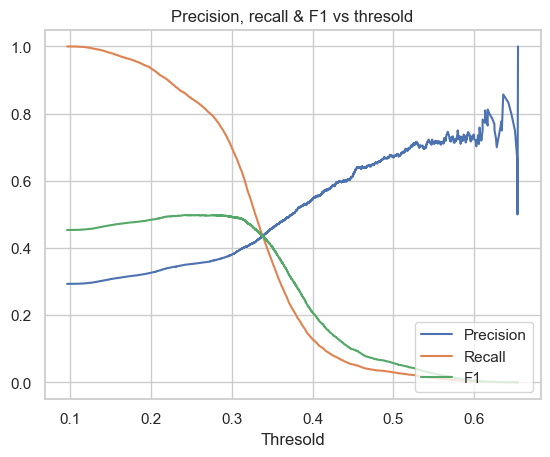

When F1 score is max 
       Precisions   Recalls       F1  Threshold
8839    0.350557  0.860941  0.49824   0.242403
Decision Tree
************************************************
Original data
accuracy  score: 0.7085952087478186
precision  score: 0.5195423707709736
recall  score: 0.0933133604823594
f1  score: 0.15749515945614073
neg_log_loss  score: -0.6191071082479823


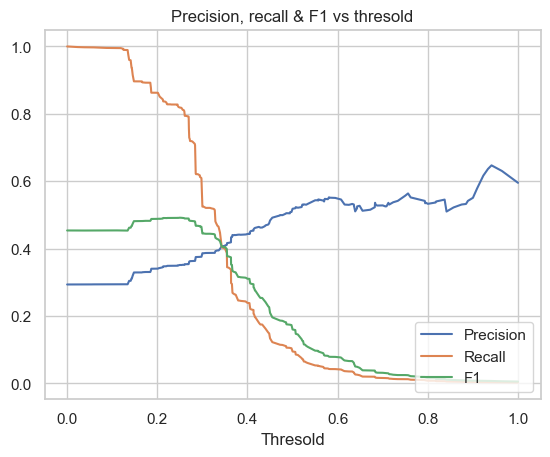

When F1 score is max 
     Precisions   Recalls        F1  Threshold
46    0.351365  0.818642  0.491693       0.25
Logistic Regression
************************************************
Original data


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means

accuracy  score: 0.7050573425013218


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means

precision  score: 0.3715282142607724


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means

recall  score: 0.007211303228526049


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means

f1  score: 0.014144768368076715


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means

neg_log_loss  score: -0.5958248675833547


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means

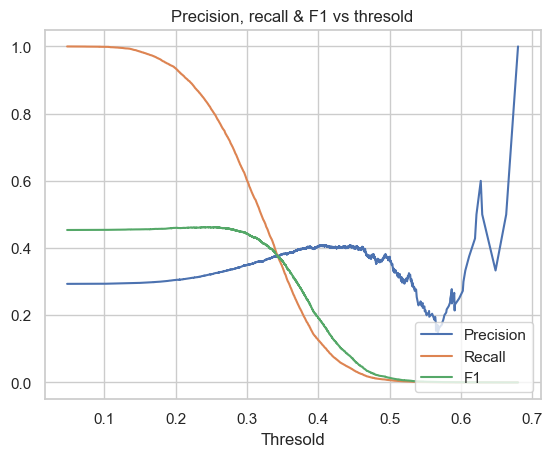

When F1 score is max 
       Precisions   Recalls        F1  Threshold
7647      0.3207  0.828759  0.462449   0.245452
XGBoost
************************************************
Original data
accuracy  score: 0.7098269821720733
precision  score: 0.5130911709300493
recall  score: 0.21956559628166814
f1  score: 0.30741227413796324
neg_log_loss  score: -0.5922101901175777


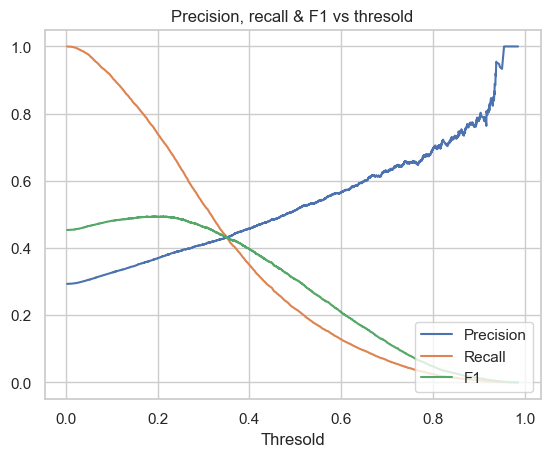

When F1 score is max 
        Precisions   Recalls        F1  Threshold
12404    0.366159  0.758368  0.493867   0.191803


In [174]:
import yaml

# Load the YAML file
with open('../../model_artifact/training/cell2cell/original.yaml', 'r') as file:
    config = yaml.safe_load(file)

# Get the list of models
models = config["models"]

# Extract hyperparameters for each model
og_random_forest_params = next(model['hyperparameters'] for model in models if model['name'] == 'Random Forest')
og_decision_tree_params = next(model['hyperparameters'] for model in models if model['name'] == 'Decision Tree')
og_logistic_regression_params = next(model['hyperparameters'] for model in models if model['name'] == 'Logistic Regression')
og_xgboost_params = next(model['hyperparameters'] for model in models if model['name'] == 'XGBoost')

# Print the hyperparameters for each model
print("Random Forest Parameters:", og_random_forest_params)
print("Decision Tree Parameters:", og_decision_tree_params)
print("Logistic Regression Parameters:", og_logistic_regression_params)
print("XGBoost Parameters:", og_xgboost_params)

# Build model and evaluate
og_clsDT = DecisionTreeClassifier(**og_decision_tree_params)
og_clsLR = LogisticRegression(**og_logistic_regression_params)
og_clsXGB = XGBClassifier(**og_xgboost_params)
og_clsRF = RandomForestClassifier(**og_random_forest_params)

og_clsModels = [og_clsRF, og_clsDT, og_clsLR, og_clsXGB]
Cross_validation_score(og_clsModels, clsModelsNm, [(X_train, y_train,'Original data')], scoreMatrix)

## Upsampling data

Random Forest Parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 7, 'n_estimators': 400}
Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 7}
Logistic Regression Parameters: {'C': 10, 'max_iter': 100, 'solver': 'saga'}
XGBoost Parameters: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 400, 'reg_alpha': 0.01, 'reg_lambda': 1}
Random Forest
************************************************
Upsamping data
accuracy  score: 0.692418270286373
precision  score: 0.6848313039872747
recall  score: 0.6682606541748879
f1  score: 0.6580017823749718
neg_log_loss  score: -0.5942972904870655


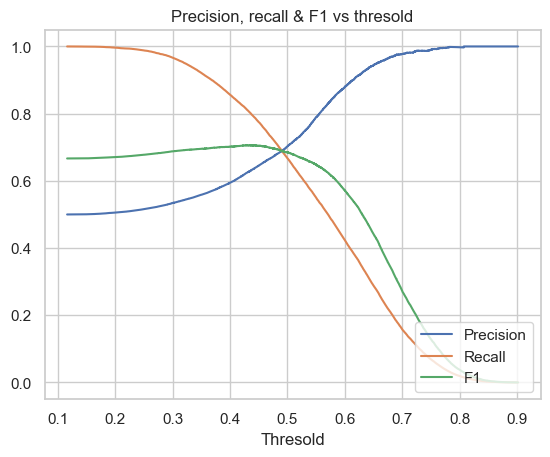

When F1 score is max 
        Precisions   Recalls        F1  Threshold
15568    0.623783  0.813377  0.706074   0.428679
Decision Tree
************************************************
Upsamping data
accuracy  score: 0.6550387405715417
precision  score: 0.6616216518453195
recall  score: 0.6028008811823906
f1  score: 0.6221493646561291
neg_log_loss  score: -0.6175191826532485


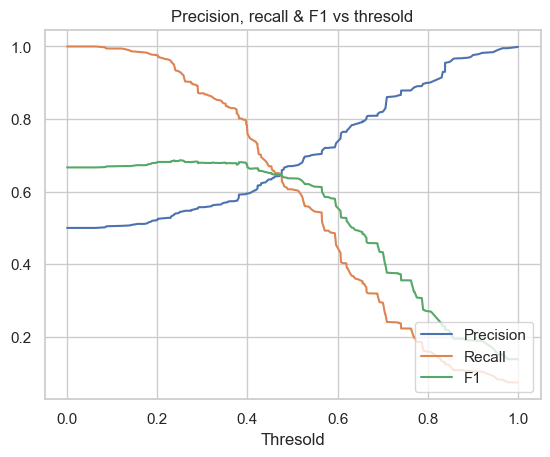

When F1 score is max 
     Precisions   Recalls        F1  Threshold
37    0.544262  0.929134  0.686431   0.251151
Logistic Regression
************************************************
Upsamping data


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means

accuracy  score: 0.5942736258091


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means

precision  score: 0.5947812891108726


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means

recall  score: 0.5868755872042466


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means

f1  score: 0.5901587194193614


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means

neg_log_loss  score: -0.6688211812796788


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means

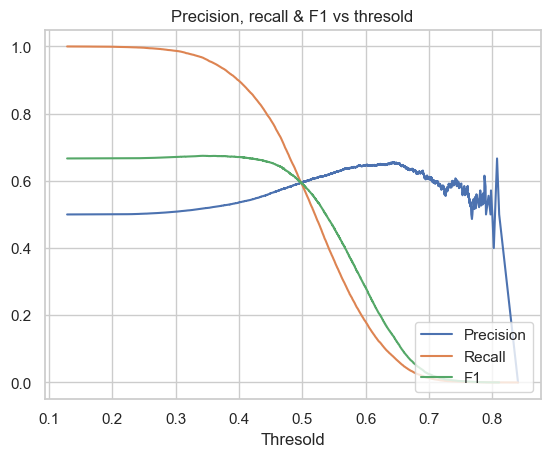

C:\Users\lenovo\AppData\Local\Temp\ipykernel_18292\3138009618.py:22: RuntimeWarning: invalid value encountered in divide
  ,'F1': 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1]+recalls[:-1])


When F1 score is max 
       Precisions   Recalls        F1  Threshold
2986    0.518062  0.966959  0.674663   0.342644
XGBoost
************************************************
Upsamping data
accuracy  score: 0.7690786423394883
precision  score: 0.8201474347553941
recall  score: 0.6533796730614652
f1  score: 0.6584775600891283
neg_log_loss  score: -0.4849233526197472


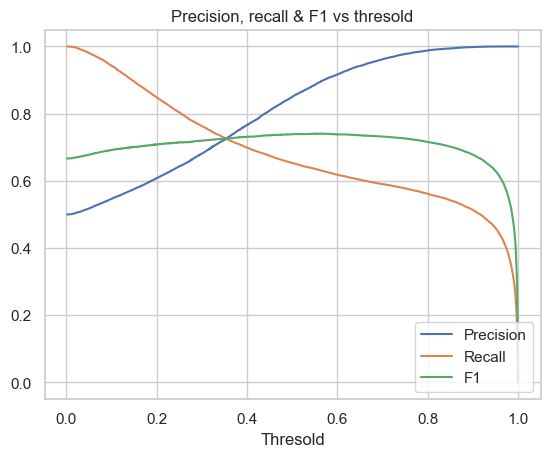

When F1 score is max 
        Precisions   Recalls        F1  Threshold
28965     0.89612  0.631002  0.740548   0.563646


In [175]:
import yaml

# Load the YAML file
with open('../../model_artifact/training/cell2cell/oversampling.yaml', 'r') as file:
    config = yaml.safe_load(file)

# Get the list of models
models = config["models"]

# Extract hyperparameters for each model
os_random_forest_params = next(model['hyperparameters'] for model in models if model['name'] == 'Random Forest')
os_decision_tree_params = next(model['hyperparameters'] for model in models if model['name'] == 'Decision Tree')
os_logistic_regression_params = next(model['hyperparameters'] for model in models if model['name'] == 'Logistic Regression')
os_xgboost_params = next(model['hyperparameters'] for model in models if model['name'] == 'XGBoost')

# Print the hyperparameters for each model
print("Random Forest Parameters:", os_random_forest_params)
print("Decision Tree Parameters:", os_decision_tree_params)
print("Logistic Regression Parameters:", os_logistic_regression_params)
print("XGBoost Parameters:", os_xgboost_params)

# Build model and evaluate
os_clsDT = DecisionTreeClassifier(**os_decision_tree_params)
os_clsLR = LogisticRegression(**os_logistic_regression_params)
os_clsXGB = XGBClassifier(**os_xgboost_params)
os_clsRF = RandomForestClassifier(**os_random_forest_params)

os_clsModels = [os_clsRF, os_clsDT, os_clsLR, os_clsXGB]
Cross_validation_score(os_clsModels, clsModelsNm, [(X_train_upsampled, y_train_upsampled,'Upsamping data')], scoreMatrix)

## Undersampling

Random Forest Parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 7, 'n_estimators': 400}
Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 7}
Logistic Regression Parameters: {'C': 10, 'max_iter': 100, 'solver': 'lbfgs'}
XGBoost Parameters: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 400, 'reg_alpha': 0.01, 'reg_lambda': 1}
Random Forest
************************************************
Undersampling data
accuracy  score: 0.6096223154140361
precision  score: 0.5901940061894309
recall  score: 0.722526202786201
f1  score: 0.64858959034901
neg_log_loss  score: -0.6549840361359505


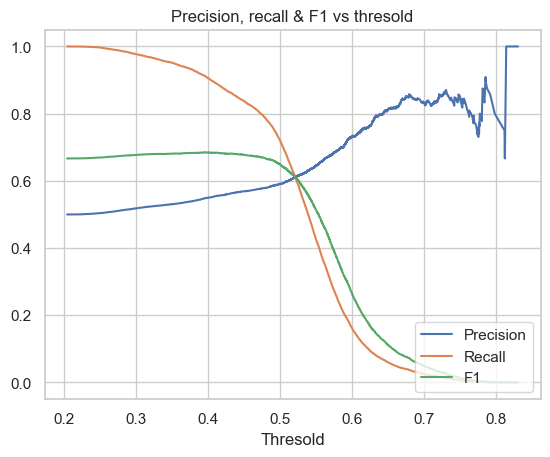

When F1 score is max 
       Precisions  Recalls        F1  Threshold
3089    0.547925  0.91368  0.685039   0.394357
Decision Tree
************************************************
Undersampling data
accuracy  score: 0.5960598512695721
precision  score: 0.5884356183829706
recall  score: 0.6443982696114848
f1  score: 0.6129913888200562
neg_log_loss  score: -0.744613446108181


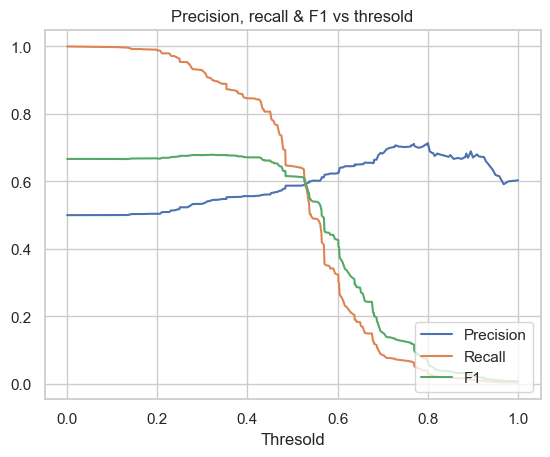

When F1 score is max 
     Precisions   Recalls        F1  Threshold
38    0.543468  0.904962  0.679105   0.319635
Logistic Regression
************************************************
Undersampling data


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

accuracy  score: 0.571305942237872


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

precision  score: 0.5704547781304663


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

recall  score: 0.5778707257799748


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

f1  score: 0.57411356912696


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

neg_log_loss  score: -0.679825044295701


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

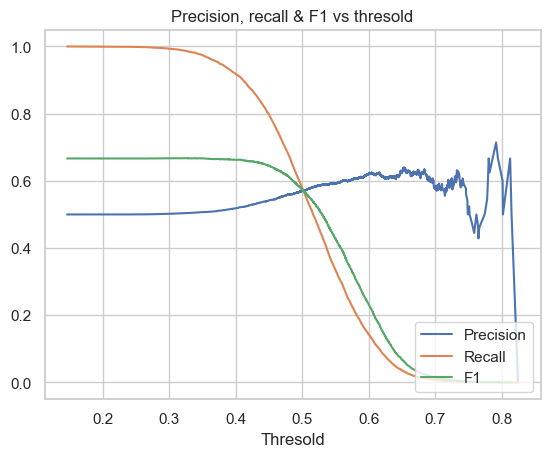

C:\Users\lenovo\AppData\Local\Temp\ipykernel_18292\3138009618.py:22: RuntimeWarning: invalid value encountered in divide
  ,'F1': 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1]+recalls[:-1])


When F1 score is max 
      Precisions   Recalls        F1  Threshold
389     0.50426  0.987407  0.667588   0.324072
XGBoost
************************************************
Undersampling data
accuracy  score: 0.6112364480192106
precision  score: 0.6086630518056607
recall  score: 0.6224273614933546
f1  score: 0.6154069890770284
neg_log_loss  score: -0.685757235509209


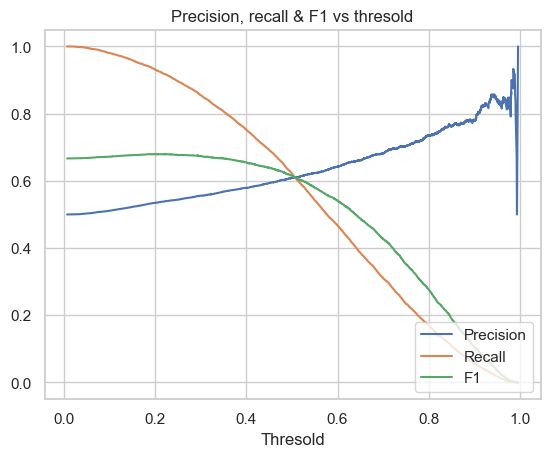

When F1 score is max 
       Precisions   Recalls        F1  Threshold
2625    0.537729  0.923474  0.679685   0.212869


In [176]:
import yaml

# Load the YAML file
with open('../../model_artifact/training/cell2cell/undersampling.yaml', 'r') as file:
    config = yaml.safe_load(file)

# Get the list of models
models = config["models"]

# Extract hyperparameters for each model
us_random_forest_params = next(model['hyperparameters'] for model in models if model['name'] == 'Random Forest')
us_decision_tree_params = next(model['hyperparameters'] for model in models if model['name'] == 'Decision Tree')
us_logistic_regression_params = next(model['hyperparameters'] for model in models if model['name'] == 'Logistic Regression')
us_xgboost_params = next(model['hyperparameters'] for model in models if model['name'] == 'XGBoost')

# Print the hyperparameters for each model
print("Random Forest Parameters:", us_random_forest_params)
print("Decision Tree Parameters:", us_decision_tree_params)
print("Logistic Regression Parameters:", us_logistic_regression_params)
print("XGBoost Parameters:", us_xgboost_params)

# Build model and evaluate
us_clsDT = DecisionTreeClassifier(**us_decision_tree_params)
us_clsLR = LogisticRegression(**us_logistic_regression_params)
us_clsXGB = XGBClassifier(**us_xgboost_params)
us_clsRF = RandomForestClassifier(**us_random_forest_params)

us_clsModels = [us_clsRF, us_clsDT, us_clsLR, us_clsXGB]
Cross_validation_score(us_clsModels, clsModelsNm, [(x_train_downsampled, y_train_downsampled,'Undersampling data')], scoreMatrix)

# Model Evaluation

In [177]:
def Cus_log_loss(target, predicted):
    if len(predicted) != len(target):
        print("Data object initiated")
        return
    
    target = [float(x) for x in target] # converting target into float
    predicted = [min([max([x,1e-15]), 1-1e-15]) for x in predicted]
        
    return -1.0 / len(target) *  sum([ target[i] * math.log(predicted[i]) + (1.0 - target[i]) * math.log(1.0 - predicted[i]) 
                                      for i in range(len(predicted))])

In [178]:
def Model_evaluation(models, clsModelsNm, x_train, y_train, x_test, y_test,  threshold ):
    
    predicted_val = {}
    for i, model in enumerate(clsModelsNm):
        models[i].fit(x_train,y_train)
        predicted_proba = models[i].predict_proba(x_test)
        
        predicted = predicted_proba[:,1].copy()
        predicted[predicted >=threshold[i]] = 1
        predicted[predicted < threshold[i]] = 0
        
        confusion_matrix_matrix = metrics.confusion_matrix(y_true = y_test
                                                   ,y_pred = predicted
                                                   #,normalize = 'true' 
                                                   )
        
        print("***********",clsModelsNm[i], "*************")
        print(metrics.classification_report(y_test, predicted))
        print("*******************************************")
        #print("Log loss score", round(metrics.log_loss(y_test,models[i].predict_proba(x_test)[:,1]),2))
        print("Log loss score", round(Cus_log_loss(y_test,predicted_proba[:,1]),2))
        print("*******************************************")
        print("Confusion matrix")
        sns.heatmap(confusion_matrix_matrix
                    , annot=True
                    , fmt="d"
                   )
        plt.xlabel("Predicted label")
        plt.ylabel("Actual label")
        plt.show()
        print("*******************************************")
        
        predicted_val[model] = predicted

## Original Data

*********** Random Forest *************
              precision    recall  f1-score   support

           0       0.86      0.33      0.48      5669
           1       0.34      0.86      0.49      2246

    accuracy                           0.49      7915
   macro avg       0.60      0.60      0.49      7915
weighted avg       0.71      0.49      0.48      7915

*******************************************
Log loss score 0.56
*******************************************
Confusion matrix


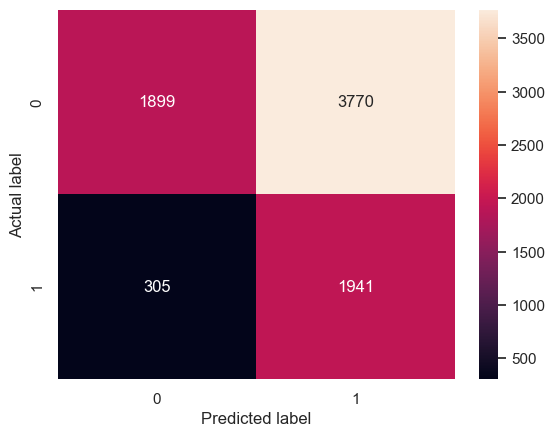

*******************************************
*********** Decision Tree *************
              precision    recall  f1-score   support

           0       0.84      0.35      0.49      5669
           1       0.34      0.83      0.48      2246

    accuracy                           0.49      7915
   macro avg       0.59      0.59      0.49      7915
weighted avg       0.70      0.49      0.49      7915

*******************************************
Log loss score 0.6
*******************************************
Confusion matrix


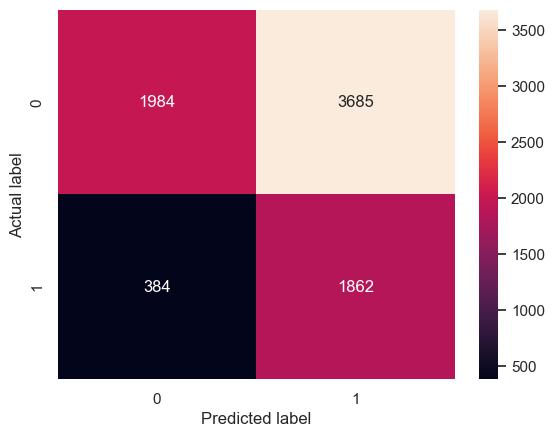

*******************************************


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


*********** Logistic Regression *************
              precision    recall  f1-score   support

           0       0.80      0.25      0.39      5669
           1       0.31      0.84      0.45      2246

    accuracy                           0.42      7915
   macro avg       0.55      0.55      0.42      7915
weighted avg       0.66      0.42      0.40      7915

*******************************************
Log loss score 0.59
*******************************************
Confusion matrix


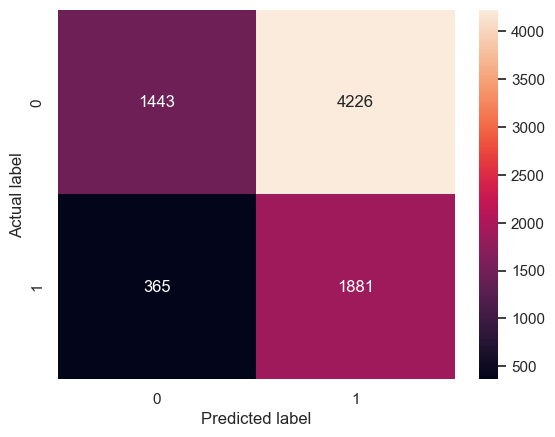

*******************************************
*********** XGBoost *************
              precision    recall  f1-score   support

           0       0.83      0.38      0.52      5669
           1       0.34      0.81      0.48      2246

    accuracy                           0.50      7915
   macro avg       0.59      0.59      0.50      7915
weighted avg       0.69      0.50      0.51      7915

*******************************************
Log loss score 0.58
*******************************************
Confusion matrix


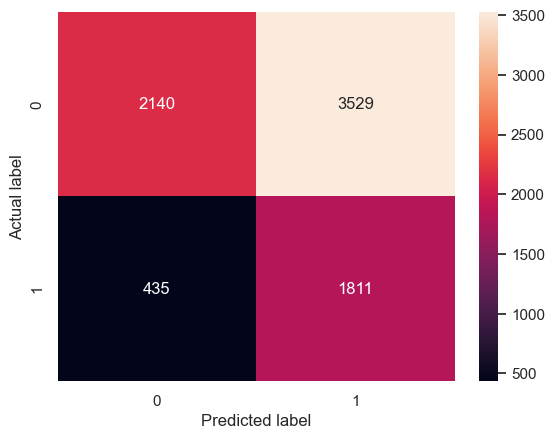

*******************************************


In [179]:
og_lr_threshold = 0.241372
og_dt_threshold = 0.25
og_rf_threshold = 0.238957
og_xgb_threshold = 0.170277
Model_evaluation(og_clsModels
                 , clsModelsNm
                 , X_train
                 , y_train
                 , X_test
                 , y_test
                 , [og_rf_threshold
                    ,og_dt_threshold
                    , og_lr_threshold
                    , og_xgb_threshold] )


## Upsampling data

*********** Random Forest *************
              precision    recall  f1-score   support

           0       0.82      0.41      0.55      5669
           1       0.34      0.76      0.47      2246

    accuracy                           0.51      7915
   macro avg       0.58      0.59      0.51      7915
weighted avg       0.68      0.51      0.53      7915

*******************************************
Log loss score 0.63
*******************************************
Confusion matrix


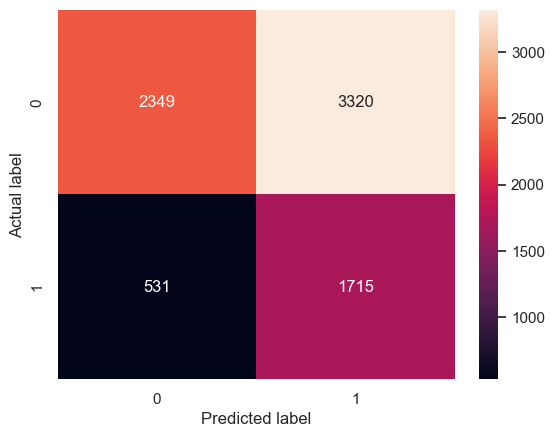

*******************************************
*********** Decision Tree *************
              precision    recall  f1-score   support

           0       0.86      0.24      0.38      5669
           1       0.32      0.90      0.47      2246

    accuracy                           0.43      7915
   macro avg       0.59      0.57      0.42      7915
weighted avg       0.71      0.43      0.40      7915

*******************************************
Log loss score 0.65
*******************************************
Confusion matrix


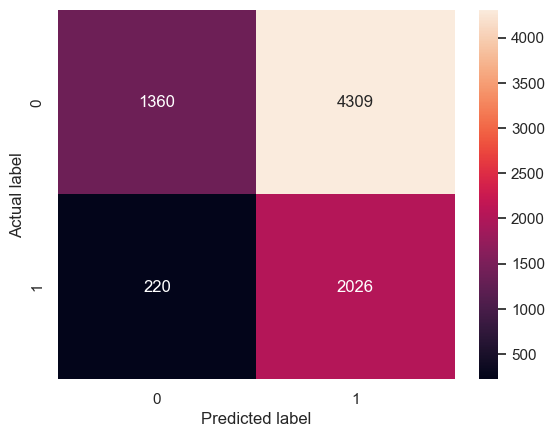

*******************************************


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


*********** Logistic Regression *************
              precision    recall  f1-score   support

           0       0.85      0.08      0.14      5669
           1       0.29      0.97      0.45      2246

    accuracy                           0.33      7915
   macro avg       0.57      0.52      0.30      7915
weighted avg       0.70      0.33      0.23      7915

*******************************************
Log loss score 0.67
*******************************************
Confusion matrix


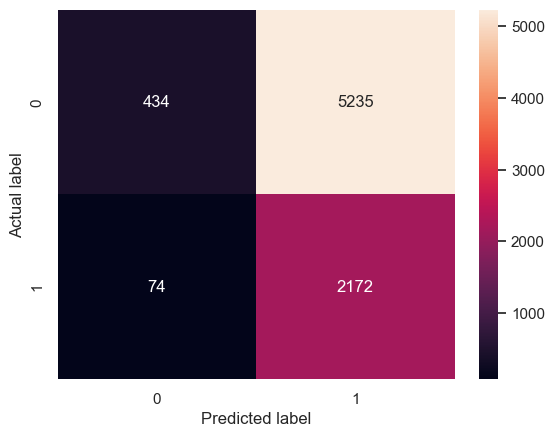

*******************************************
*********** XGBoost *************
              precision    recall  f1-score   support

           0       0.82      0.44      0.57      5669
           1       0.35      0.76      0.48      2246

    accuracy                           0.53      7915
   macro avg       0.59      0.60      0.53      7915
weighted avg       0.69      0.53      0.55      7915

*******************************************
Log loss score 0.59
*******************************************
Confusion matrix


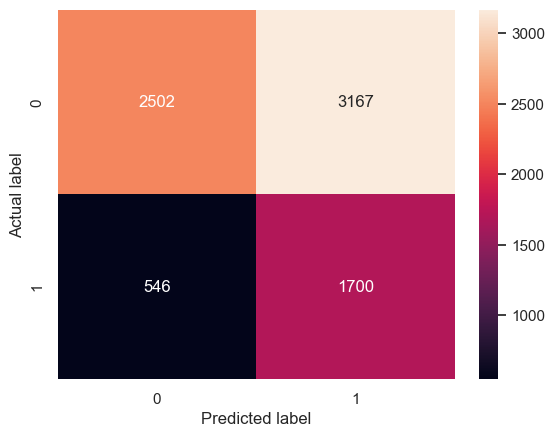

*******************************************


In [180]:
os_lr_threshold = 0.322924
os_dt_threshold = 0.283333
os_rf_threshold = 0.400855
os_xgb_threshold = 0.21184
Model_evaluation(os_clsModels
                 , clsModelsNm
                 , X_train_upsampled
                 , y_train_upsampled
                 , X_test
                 , y_test
                 , [os_rf_threshold
                    ,os_dt_threshold
                    , os_lr_threshold
                    , os_xgb_threshold] )


## Downsampling data

*********** Random Forest *************
              precision    recall  f1-score   support

           0       0.84      0.39      0.53      5669
           1       0.35      0.81      0.49      2246

    accuracy                           0.51      7915
   macro avg       0.59      0.60      0.51      7915
weighted avg       0.70      0.51      0.52      7915

*******************************************
Log loss score 0.65
*******************************************
Confusion matrix


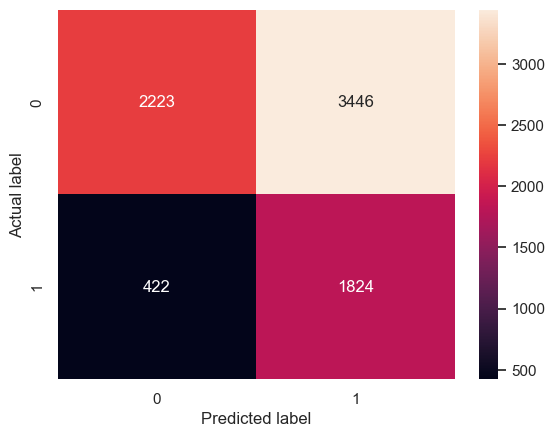

*******************************************
*********** Decision Tree *************
              precision    recall  f1-score   support

           0       0.86      0.32      0.47      5669
           1       0.34      0.86      0.48      2246

    accuracy                           0.48      7915
   macro avg       0.60      0.59      0.48      7915
weighted avg       0.71      0.48      0.48      7915

*******************************************
Log loss score 0.67
*******************************************
Confusion matrix


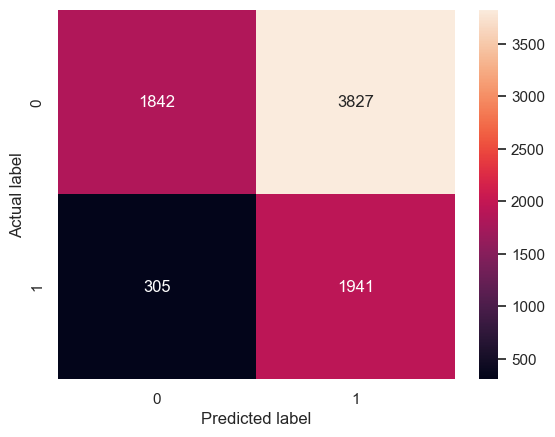

*******************************************


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


*********** Logistic Regression *************
              precision    recall  f1-score   support

           0       0.83      0.17      0.28      5669
           1       0.30      0.91      0.45      2246

    accuracy                           0.38      7915
   macro avg       0.57      0.54      0.37      7915
weighted avg       0.68      0.38      0.33      7915

*******************************************
Log loss score 0.68
*******************************************
Confusion matrix


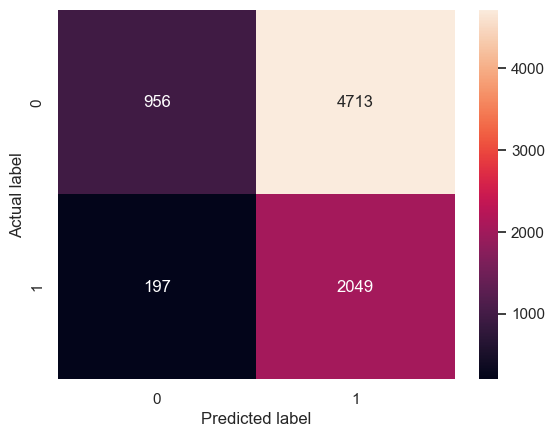

*******************************************
*********** XGBoost *************
              precision    recall  f1-score   support

           0       0.78      0.71      0.74      5669
           1       0.40      0.48      0.44      2246

    accuracy                           0.64      7915
   macro avg       0.59      0.60      0.59      7915
weighted avg       0.67      0.64      0.65      7915

*******************************************
Log loss score 0.69
*******************************************
Confusion matrix


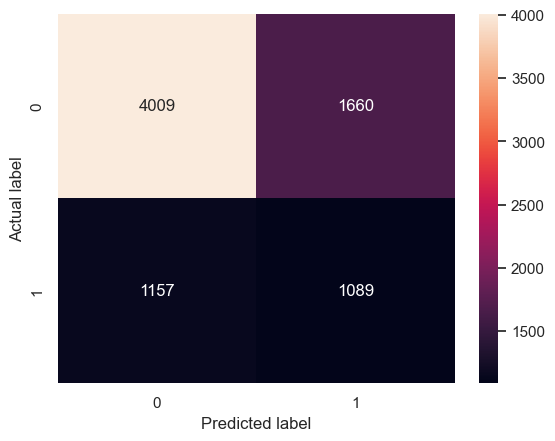

*******************************************


In [181]:
us_lr_threshold = 0.409897
us_dt_threshold = 0.384615
us_rf_threshold = 0.46325
us_xgb_threshold = 0.57395
Model_evaluation(us_clsModels
                 , clsModelsNm
                 , x_train_downsampled
                 , y_train_downsampled
                 , X_test
                 , y_test
                 , [us_rf_threshold
                    ,us_dt_threshold
                    , us_lr_threshold
                    , us_xgb_threshold] )


# Additional Material

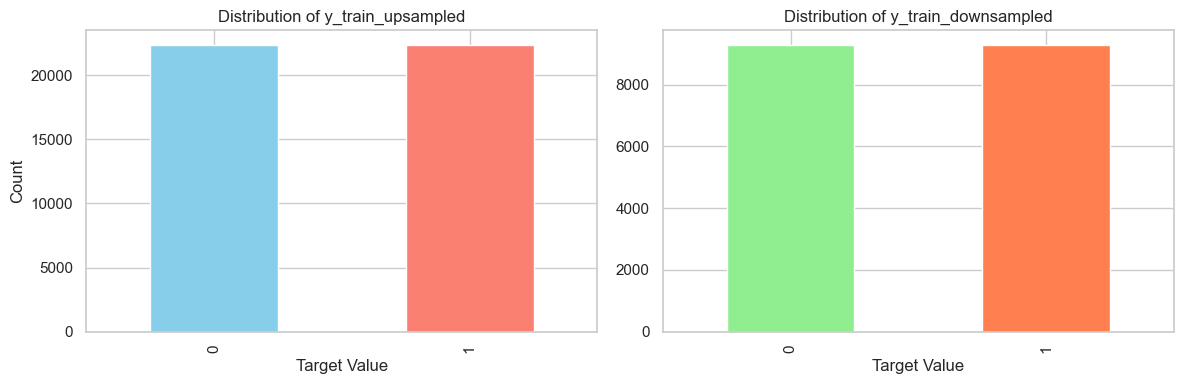

In [182]:
# Assuming both y_train_upsampled and y_train_downsampled are pandas Series

# Ensure that the object is a pandas Series and apply value_counts directly
if isinstance(y_train_upsampled, pd.Series):
    distribution_upsampled = y_train_upsampled.value_counts()
else:
    print("y_train_upsampled is not a Series.")

if isinstance(y_train_downsampled, pd.Series):
    distribution_downsampled = y_train_downsampled.value_counts()
else:
    print("y_train_downsampled is not a Series.")

# Create subplots for side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot for y_train_upsampled
distribution_upsampled.plot(kind='bar', color=['skyblue', 'salmon'], ax=axes[0])
axes[0].set_title('Distribution of y_train_upsampled')
axes[0].set_xlabel('Target Value')
axes[0].set_ylabel('Count')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['0', '1'])

# Plot for y_train_downsampled
distribution_downsampled.plot(kind='bar', color=['lightgreen', 'coral'], ax=axes[1])
axes[1].set_title('Distribution of y_train_downsampled')
axes[1].set_xlabel('Target Value')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['0', '1'])

# Show the plot
plt.tight_layout()
plt.show()
